1. Main objective is to prevent churn of high value customers(top 20% customers who generate revenue around 80%) from which we will be able to reduce the significant revenue leakage.
2. Amongst the prepaid and postpaid models , the postpaid customers should inform on prior-hand for churn while in prepaid , the customer simply stops using the network without any notice. Also the reason might be that the customer has moved out-of-town and so he has stopped using the services or the customer might have moved to new network , which is very tedious to decide.
3. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
4. In churn prediction, we assume that there are three phases of customer lifecycle :
a. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.<br>
b. The ‘action’ phase: The customer becomes unhappy with the services due to several issues. It is the phase where we can take corrective measures to prevent customers from churn.<br>
c. The ‘churn’ phase: In this phase, the customer is said to have churned. We need to define churn based on this phase.<br>
5. This project is all about  Usage-based churn in Indian and Southeast Asian market.
Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
churn =  pd.read_csv("C:\\Users\\Mahesh\\Desktop\\IIT-B\\Machine Learning\\Telecom Churn Case Study\\telecom_churn_data.csv")
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [4]:
churn.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [5]:
churn.shape

(99999, 226)

## Step 2 : Data Preparation

### Derive New Features
Total Amount can be considered as the product of recharge done for data(3G,4G,VOIP,Internet calls etc) as well as normal calling(Incoming/Outgoing) , considering for all the months from June, July, August and September which are encoded as 6, 7, 8 and 9, respectively.

In [6]:
# Total Amount of Recharge
churn["total_amt_recharge_6"] = churn["total_rech_data_6"]  * churn['av_rech_amt_data_6']
churn["total_amt_recharge_7"] = churn["total_rech_data_7"]  * churn['av_rech_amt_data_7']
churn["total_amt_recharge_8"] = churn["total_rech_data_8"]  * churn['av_rech_amt_data_8']
churn["total_amt_recharge_9"] = churn["total_rech_data_9"]  * churn['av_rech_amt_data_9']

### Filter High-Value Customer
1. High Value Customer:are those who are the top 20% customers who generate revenue around 80% amongst the total.
2. Filter should be done on customers who recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase) .i.e search for columns with recharge information for the first two months i.e 6 & 7 respectively.

In [7]:
# 1.columns with recharge information
total_recharge_columns = [col for col in churn.columns if 'total_rech_' in col]
print(total_recharge_columns)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [8]:
# 2.Average Recharge amount in the first two months i.e 6 & 7
avg_rech_amt_6_7 = (churn["total_rech_amt_6"].fillna(0) + churn["total_amt_recharge_6"].fillna(0) + 
churn["total_rech_amt_7"].fillna(0) + churn["total_amt_recharge_7"].fillna(0))/2.0

In [9]:
# 3.70th Percentile of Avg Recharge Amount
percntile70_6n7 = np.percentile(avg_rech_amt_6_7, 70.0)
print('70th percentile of the average recharge amount in the first two months (the good phase): ', percntile70_6n7)

70th percentile of the average recharge amount in the first two months (the good phase):  478.0


In [10]:
churn_high_val_cust = churn[avg_rech_amt_6_7 >= percntile70_6n7]
print('Dataframe Shape after Filtering High Value Customers: ', churn_high_val_cust.shape)

Dataframe Shape after Filtering High Value Customers:  (30001, 230)


#### Drop total_rech_data_* and av_rech_amt_data_* as new feature is derived from the raw variables.

In [11]:
# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
churn.drop(drop_col, axis=1, inplace=True)

In [12]:
churn.shape

(99999, 222)

## Step 3 : Data Cleaning & EDA

1. Column Names need to be converted into meaningfull names.
2. Datetime columns should be converted to datetime. 

### Covert Column Names to meaningfull names

In [13]:
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g which are unique from others which has 6,7,8 & 9 instead of alphabets.

churn_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

### Covert  Date Column to Datetime  

In [14]:
datetime_columns = churn_high_val_cust.select_dtypes(include=['object'])
print(datetime_columns.iloc[0])
for col in datetime_columns.columns:
    churn_high_val_cust[col] = pd.to_datetime(churn_high_val_cust[col])

churn_high_val_cust.shape

last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
last_date_of_month_9        9/30/2014
date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


(30001, 230)

### Convert aon to months

In [15]:
#Conevrt AON in Months
churn_high_val_cust['aon_mon'] = churn_high_val_cust['aon']/30
churn_high_val_cust.drop('aon', axis=1, inplace=True)
churn_high_val_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

In [16]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
160  date_of_last_rech_data_9     49.27
172           count_rech_2g_9     49.27
192                 arpu_3g_9     49.27
168           max_rech_data_9     49.27
228      total_amt_recharge_9     49.27
196                 arpu_2g_9     49.27
164         total_rech_data_9     49.27
200          night_pck_user_9     49.27
176           count_rech_3g_9     49.27
220                 fb_user_9     49.27
180        av_rech_amt_data_9     49.27
179        av_rech_amt_data_8     46.83
167           max_rech_data_8     46.83
175           count_rech_3g_8     46.83
163         total_rech_data_8     46.83
159  date_of_last_rech_data_8     46.83
199          night_pck_user_8     46.83
227      total_amt_recharge_8     46.83
195                 arpu_2g_8     46.83
219                 fb_user_8     46.83
191                 arpu_3g_8     46.83
171           count_rech_2g_8     46.83
169           count_rech_2g_6     44.15
161         total_rech_data_6     44.15
157  date_of_last_rech_data_6     44.15
165           max_rech_data_6     44.15
217                 fb_user_6     44.15
189                 arpu_3g_6     44.15
173           count_rech_3g_6     44.15
193                 arpu_2g_6     44.15
225      total_amt_recharge_6     44.15
197          night_pck_user_6     44.15
177        av_rech_amt_data_6     44.15
198          night_pck_user_7     43.15
178        av_rech_amt_data_7     43.15
218                 fb_user_7     43.15
226      total_amt_recharge_7     43.15
158  date_of_last_rech_data_7     43.15
194                 arpu_2g_7     43.15
170           count_rech_2g_7     43.15
162         total_rech_data_7     43.15
190                 arpu_3g_7     43.15
174           count_rech_3g_7     43.15
166           max_rech_data_7     43.15
68               std_og_mou_9      6.34
108          std_ic_t2m_mou_9      6.34
92           loc_ic_t2m_mou_9      6.34
104          std_ic_t2t_mou_9      6.34
112          std_ic_t2f_mou_9      6.34
64           std_og_t2c_mou_9      6.34
76               spl_og_mou_9      6.34
116          std_ic_t2o_mou_9      6.34
60           std_og_t2f_mou_9      6.34
120              std_ic_mou_9      6.34
72               isd_og_mou_9      6.34
28              roam_og_mou_9      6.34
132              isd_ic_mou_9      6.34
56           std_og_t2m_mou_9      6.34
44           loc_og_t2c_mou_9      6.34
24              roam_ic_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
20               offnet_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
40           loc_og_t2f_mou_9      6.34
16                onnet_mou_9      6.34
48               loc_og_mou_9      6.34
128              spl_ic_mou_9      6.34
136               ic_others_9      6.34
88           loc_ic_t2t_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
52           std_og_t2t_mou_9      6.34
80                og_others_9      6.34
100              loc_ic_mou_9      6.34
91           loc_ic_t2m_mou_8      3.91
127              spl_ic_mou_8      3.91
99               loc_ic_mou_8      3.91
103          std_ic_t2t_mou_8      3.91
107          std_ic_t2m_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
119              std_ic_mou_8      3.91
131              isd_ic_mou_8      3.91
135               ic_others_8      3.91
87           loc_ic_t2t_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
95           loc_ic_t2f_mou_8      3.91
71               isd_og_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
39           loc_og_t2f_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
47               loc_og_mou_8      3.91
23              roam_ic_mou_8      3.91
19               offnet_mou_8      3.91
15                onnet_mou_8      3.91
51           std_og_t2t_mou_8      3.91
59           std_og_t2f_mou_8      3.91
63           std_og_t2c_mou_8      3.91
67               std_og_mou_8      3.91
55           std_og_t2m_mou_8      3.91
27              roam_o

There are no null values in total_rech_amt columns. But there are null values in av_rech_amt_data and total_rech_data columns. 

There is an interesting pattern here. All the null columns related to data for the months of 6,7,8,9 follow the below pattern Month 6 - 50.33% Month 7 -49.47% Month 8 - 51.77% Month 9 -53.49% And this is repeated for all the data columns of same months Similarly for all the call columns with null values the following pattern is repeated Month 6 - 0.20% Month 7 - 0.32% Month 8 - 1.93% Month 9 - 2.76%<br>
<br>
The high percentage of null values in data columns and low percentage of null data in call columns indicate those customers use the mobile service only for the calls<br>
<br>
Since the pattern is repeated we can assume that the null values represent customers not using that partical service so we can impute the missing with 0's<br>
<br>
But if the number of datapoints are less and if they are not diminishing the minaroty class values we can simply drop them

In [17]:
#Fill missing values in av_rech_amt_data and total_rech_data columns
churn_high_val_cust[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=churn_high_val_cust[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [18]:
#Get no of unique mobile numbers, this is an id column
len(churn_high_val_cust['mobile_number'].unique())

30001

### Tag churners and remove attributes of the churn phase

In [19]:
#Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' should be 0
churn_high_val_cust['churn']=churn_high_val_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [20]:
#Get only the data where the customers churned
churned_total = churn_high_val_cust[churn_high_val_cust['churn']==1]

In [21]:
#No of churned datapoints
len(churned_total)

2441

In [22]:
#No of non churned customers
len(churn_high_val_cust[churn_high_val_cust['churn']==0])

27560

Only 2441 data points are present for churned customers, so dropping null rows would significantly affect the minority class

In [23]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
196                 arpu_2g_9     49.27
176           count_rech_3g_9     49.27
172           count_rech_2g_9     49.27
192                 arpu_3g_9     49.27
220                 fb_user_9     49.27
160  date_of_last_rech_data_9     49.27
228      total_amt_recharge_9     49.27
168           max_rech_data_9     49.27
200          night_pck_user_9     49.27
219                 fb_user_8     46.83
171           count_rech_2g_8     46.83
199          night_pck_user_8     46.83
175           count_rech_3g_8     46.83
227      total_amt_recharge_8     46.83
195                 arpu_2g_8     46.83
191                 arpu_3g_8     46.83
159  date_of_last_rech_data_8     46.83
167           max_rech_data_8     46.83
225      total_amt_recharge_6     44.15
217                 fb_user_6     44.15
173           count_rech_3g_6     44.15
193                 arpu_2g_6     44.15
197          night_pck_user_6     44.15
165           max_rech_data_6     44.15
157  date_of_last_rech_data_6     44.15
169           count_rech_2g_6     44.15
189                 arpu_3g_6     44.15
198          night_pck_user_7     43.15
166           max_rech_data_7     43.15
170           count_rech_2g_7     43.15
158  date_of_last_rech_data_7     43.15
174           count_rech_3g_7     43.15
190                 arpu_3g_7     43.15
194                 arpu_2g_7     43.15
226      total_amt_recharge_7     43.15
218                 fb_user_7     43.15
112          std_ic_t2f_mou_9      6.34
52           std_og_t2t_mou_9      6.34
88           loc_ic_t2t_mou_9      6.34
72               isd_og_mou_9      6.34
64           std_og_t2c_mou_9      6.34
132              isd_ic_mou_9      6.34
128              spl_ic_mou_9      6.34
136               ic_others_9      6.34
116          std_ic_t2o_mou_9      6.34
60           std_og_t2f_mou_9      6.34
68               std_og_mou_9      6.34
80                og_others_9      6.34
120              std_ic_mou_9      6.34
56           std_og_t2m_mou_9      6.34
104          std_ic_t2t_mou_9      6.34
48               loc_og_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
100              loc_ic_mou_9      6.34
16                onnet_mou_9      6.34
20               offnet_mou_9      6.34
24              roam_ic_mou_9      6.34
108          std_ic_t2m_mou_9      6.34
28              roam_og_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
40           loc_og_t2f_mou_9      6.34
92           loc_ic_t2m_mou_9      6.34
44           loc_og_t2c_mou_9      6.34
76               spl_og_mou_9      6.34
95           loc_ic_t2f_mou_8      3.91
119              std_ic_mou_8      3.91
91           loc_ic_t2m_mou_8      3.91
75               spl_og_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
79                og_others_8      3.91
107          std_ic_t2m_mou_8      3.91
87           loc_ic_t2t_mou_8      3.91
99               loc_ic_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
51           std_og_t2t_mou_8      3.91
27              roam_og_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
23              roam_ic_mou_8      3.91
39           loc_og_t2f_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
47               loc_og_mou_8      3.91
103          std_ic_t2t_mou_8      3.91
127              spl_ic_mou_8      3.91
55           std_og_t2m_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
59           std_og_t2f_mou_8      3.91
19               offnet_mou_8      3.91
135               ic_others_8      3.91
15                onnet_mou_8      3.91
63           std_og_t2c_mou_8      3.91
131              isd_ic_mou_8      3.91
67               std_og_mou_8      3.91
71               isd_og_mou_8      3.91
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
105          std_ic_t2m_mou_6      1.82
125              spl_ic_mou_6      1.82
109          std_ic_t2f_mou_6      1.82
117              std_i

1. The data columns are having high percentage of null values for churned customers wheareas call columns are having low percentage of null values. 
2. It could mean most customers are using the mobile service for calls rather than data. Since majority of the columns are having null values we cannot simply drop them. 
3. We cant drop the rows as this would further diminish minority class. Before imputingthe values lets look at all the columns having null values

In [24]:
#Get the dat of all the rows with null values in more than 40 columns
churn_high_val_cust[churn_high_val_cust.isnull().sum(axis=1)>=40]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109            0.00            0.00   
7         7000701601        109            0.00            0.00   
67        7000800341        109            0.00            0.00   
77        7001328263        109            0.00            0.00   
86        7000175867        109            0.00            0.00   
...              ...        ...             ...             ...   
99700     7000084762        109            0.00            0.00   
99717     7001085238        109            0.00            0.00   
99790     7000008246        109            0.00            0.00   
99827     7000231239        109            0.00            0.00   
99851     7000565233        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                0.00           2014-06-30           2014-07-31   
7                0.00           2014-06-30           2014-07-31   
67               0.00           2014-06-30           2014-07-31   
77               0.00           2014-06-30           2014-07-31   
86               0.00           2014-06-30           2014-07-31   
...               ...                  ...                  ...   
99700            0.00           2014-06-30           2014-07-31   
99717            0.00           2014-06-30           2014-07-31   
99790            0.00           2014-06-30           2014-07-31   
99827            0.00           2014-06-30           2014-07-31   
99851            0.00           2014-06-30                  NaT   

      last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  \
0               2014-08-31           2014-09-30  197.38  214.82  213.80   
7               2014-08-31           2014-09-30 1069.18 1349.85 3171.48   
67              2014-08-31                  NaT  218.82  386.51  386.50   
77              2014-08-31           2014-09-30   30.00   82.38  674.95   
86              2014-08-31           2014-09-30  319.70   56.08    1.03   
...                    ...                  ...     ...     ...     ...   
99700           2014-08-31           2014-09-30  598.58  191.40    0.20   
99717           2014-08-31                  NaT  863.07  783.77  456.19   
99790           2014-08-31           2014-09-30 1942.95    0.00    0.00   
99827           2014-08-31           2014-09-30 1053.04   20.06    0.00   
99851                  NaT                  NaT  446.57    0.00    0.00   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.10          nan          nan         0.00          nan   
7      500.00        57.84        54.68        52.29          nan   
67       0.00         0.00         0.00         0.00          nan   
77     158.71          nan        34.23       149.69         6.31   
86       0.00       141.76        11.23         0.00          nan   
...       ...          ...          ...          ...          ...   
99700    0.00       205.18        53.86          nan          nan   
99717    0.00       420.81       570.36       317.06          nan   
99790    0.00       154.31          nan          nan          nan   
99827    0.00      1263.94         0.06          nan          nan   
99851    0.00        11.29          nan          nan          nan   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               nan           nan          0.00           nan            nan   
7            453.43        567.16        325.91           nan          16.23   
67             0.00          0.00          0.00           nan           0.00   
77              nan         39.44        179.18         57.68            nan   
86           182.76         32.79          1.71           nan           0.00   
...             ...           ...           ...           ...            ...   
99700        127.83         91.86           nan           nan           0.00   
99717        431.93        

In [25]:
#Lets see which columns are null when 'date_of_last_rech_data_6' are null
churn_high_val_cust[churn_high_val_cust.isnull().sum(axis=1)>=40].columns[churn_high_val_cust[pd.isnull(churn_high_val_cust['date_of_last_rech_data_6'])].isna().all()].tolist()

['date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6',
 'total_amt_recharge_6']

In [26]:
#Lets see which columns are null when 'date_of_last_rech_data_7' are null
churn_high_val_cust[churn_high_val_cust.isnull().sum(axis=1)>=40].columns[churn_high_val_cust[pd.isnull(churn_high_val_cust['date_of_last_rech_data_7'])].isna().all()].tolist()

['date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7',
 'total_amt_recharge_7']

1. When a data or a call column of a particular month is having null value all the columns of that particular month either call or data have null values for those respective months. 
2. So this can be assumed a case of non usage of service rather than a missing values so the null columns can be imputed by 0

In [27]:
#The last date of month columns are having null values and the columns have same value for each month respectively so they can be easily imputed
churn_high_val_cust['last_date_of_month_6'] = churn_high_val_cust['last_date_of_month_6'].fillna('6/30/2014')
churn_high_val_cust['last_date_of_month_7'] = churn_high_val_cust['last_date_of_month_7'].fillna('7/31/2014')
churn_high_val_cust['last_date_of_month_8'] = churn_high_val_cust['last_date_of_month_8'].fillna('8/31/2014')

In [28]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
168           max_rech_data_9     49.27
196                 arpu_2g_9     49.27
200          night_pck_user_9     49.27
192                 arpu_3g_9     49.27
228      total_amt_recharge_9     49.27
172           count_rech_2g_9     49.27
160  date_of_last_rech_data_9     49.27
220                 fb_user_9     49.27
176           count_rech_3g_9     49.27
167           max_rech_data_8     46.83
171           count_rech_2g_8     46.83
219                 fb_user_8     46.83
195                 arpu_2g_8     46.83
199          night_pck_user_8     46.83
175           count_rech_3g_8     46.83
159  date_of_last_rech_data_8     46.83
227      total_amt_recharge_8     46.83
191                 arpu_3g_8     46.83
157  date_of_last_rech_data_6     44.15
197          night_pck_user_6     44.15
165           max_rech_data_6     44.15
169           count_rech_2g_6     44.15
173           count_rech_3g_6     44.15
189                 arpu_3g_6     44.15
193                 arpu_2g_6     44.15
225      total_amt_recharge_6     44.15
217                 fb_user_6     44.15
194                 arpu_2g_7     43.15
158  date_of_last_rech_data_7     43.15
218                 fb_user_7     43.15
166           max_rech_data_7     43.15
198          night_pck_user_7     43.15
170           count_rech_2g_7     43.15
190                 arpu_3g_7     43.15
226      total_amt_recharge_7     43.15
174           count_rech_3g_7     43.15
80                og_others_9      6.34
88           loc_ic_t2t_mou_9      6.34
68               std_og_mou_9      6.34
72               isd_og_mou_9      6.34
52           std_og_t2t_mou_9      6.34
64           std_og_t2c_mou_9      6.34
100              loc_ic_mou_9      6.34
104          std_ic_t2t_mou_9      6.34
60           std_og_t2f_mou_9      6.34
108          std_ic_t2m_mou_9      6.34
56           std_og_t2m_mou_9      6.34
112          std_ic_t2f_mou_9      6.34
116          std_ic_t2o_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
92           loc_ic_t2m_mou_9      6.34
40           loc_og_t2f_mou_9      6.34
136               ic_others_9      6.34
16                onnet_mou_9      6.34
20               offnet_mou_9      6.34
24              roam_ic_mou_9      6.34
28              roam_og_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
120              std_ic_mou_9      6.34
76               spl_og_mou_9      6.34
132              isd_ic_mou_9      6.34
44           loc_og_t2c_mou_9      6.34
128              spl_ic_mou_9      6.34
48               loc_og_mou_9      6.34
135               ic_others_8      3.91
103          std_ic_t2t_mou_8      3.91
107          std_ic_t2m_mou_8      3.91
99               loc_ic_mou_8      3.91
79                og_others_8      3.91
95           loc_ic_t2f_mou_8      3.91
91           loc_ic_t2m_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
87           loc_ic_t2t_mou_8      3.91
131              isd_ic_mou_8      3.91
127              spl_ic_mou_8      3.91
119              std_ic_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
47               loc_og_mou_8      3.91
51           std_og_t2t_mou_8      3.91
27              roam_og_mou_8      3.91
39           loc_og_t2f_mou_8      3.91
19               offnet_mou_8      3.91
63           std_og_t2c_mou_8      3.91
23              roam_ic_mou_8      3.91
71               isd_og_mou_8      3.91
55           std_og_t2m_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
15                onnet_mou_8      3.91
59           std_og_t2f_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
75               spl_og_mou_8      3.91
67               std_og_mou_8      3.91
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
113          std_ic_t2o_mou_6      1.82
33           loc_og_t2m_mou_6      1.82
57           std_og_t2f_mou_6      1.82
53           std_og_t2

In [29]:
#Convert the date columns from string to date type
dateColumns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
churn_high_val_cust[dateColumns]=churn_high_val_cust[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
churn_high_val_cust[dateColumns]

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0               2014-06-30                  NaT                  NaT   
7               2014-06-30                  NaT                  NaT   
8               2014-06-30                  NaT                  NaT   
21              2014-06-30                  NaT                  NaT   
23              2014-06-30                  NaT                  NaT   
...                    ...                  ...                  ...   
99981           2014-06-30                  NaT                  NaT   
99984           2014-06-30                  NaT                  NaT   
99986           2014-06-30                  NaT                  NaT   
99988           2014-06-30                  NaT                  NaT   
99997           2014-06-30                  NaT                  NaT   

      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0              2014-06-21          2014-07-16          2014-08-08   
7              2014-06-27          2014-07-25          2014-08-26   
8              2014-06-25          2014-07-31          2014-08-30   
21             2014-06-30          2014-07-31          2014-08-31   
23             2014-06-18          2014-07-07          2014-08-24   
...                   ...                 ...                 ...   
99981          2014-06-17          2014-07-25          2014-08-27   
99984          2014-06-21          2014-07-31          2014-08-27   
99986          2014-06-20          2014-07-28          2014-08-18   
99988          2014-06-30          2014-07-28          2014-08-29   
99997          2014-06-17          2014-07-19          2014-08-20   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                   2014-06-21               2014-07-16   
7                          NaT                      NaT   
8                          NaT               2014-07-31   
21                         NaT                      NaT   
23                         NaT               2014-07-07   
...                        ...                      ...   
99981               2014-06-17               2014-07-14   
99984               2014-06-15               2014-07-31   
99986               2014-06-17               2014-07-18   
99988                      NaT               2014-07-26   
99997               2014-06-17               2014-07-19   

      date_of_last_rech_data_8  
0                   2014-08-08  
7                          NaT  
8                   2014-08-23  
21                         NaT  
23                  2014-08-06  
...                        ...  
99981               2014-08-23  
99984               2014-08-27  
99986               2014-08-14  
99988               2014-08-23  
99997               2014-08-20  

[30001 rows x 9 columns]

1. The mising values of last recharge date for call or data can be assumed there is no recharge done for that particular month. 2. Lets create new columns which indicate whether a recharge has been done or not for that particular month for both data and calls

In [30]:
#Transform the existing date of last recharge columns with 1 indicating a recharge and -1 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

churn_high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = churn_high_val_cust[dateColumnsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)

In [31]:
#Convert the features to category
churn_high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = churn_high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))

In [32]:
#Lets look at the columns we created
churn_high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]]

rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7 rech_data_8
0              1          1          1           1           1           1
7              1          1          1          -1          -1          -1
8              1          1          1          -1           1           1
21             1          1          1          -1          -1          -1
23             1          1          1          -1           1           1
...          ...        ...        ...         ...         ...         ...
99981          1          1          1           1           1           1
99984          1          1          1           1           1           1
99986          1          1          1           1           1           1
99988          1          1          1          -1           1           1
99997          1          1          1           1           1           1

[30001 rows x 6 columns]

In [33]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
6        last_date_of_month_7     99.91
7        last_date_of_month_8     99.45
160  date_of_last_rech_data_9     49.27
196                 arpu_2g_9     49.27
220                 fb_user_9     49.27
228      total_amt_recharge_9     49.27
176           count_rech_3g_9     49.27
200          night_pck_user_9     49.27
168           max_rech_data_9     49.27
172           count_rech_2g_9     49.27
192                 arpu_3g_9     49.27
167           max_rech_data_8     46.83
199          night_pck_user_8     46.83
195                 arpu_2g_8     46.83
159  date_of_last_rech_data_8     46.83
219                 fb_user_8     46.83
227      total_amt_recharge_8     46.83
171           count_rech_2g_8     46.83
191                 arpu_3g_8     46.83
175           count_rech_3g_8     46.83
189                 arpu_3g_6     44.15
173           count_rech_3g_6     44.15
217                 fb_user_6     44.15
197          night_pck_user_6     44.15
157  date_of_last_rech_data_6     44.15
165           max_rech_data_6     44.15
169           count_rech_2g_6     44.15
193                 arpu_2g_6     44.15
225      total_amt_recharge_6     44.15
158  date_of_last_rech_data_7     43.15
218                 fb_user_7     43.15
166           max_rech_data_7     43.15
170           count_rech_2g_7     43.15
190                 arpu_3g_7     43.15
194                 arpu_2g_7     43.15
174           count_rech_3g_7     43.15
198          night_pck_user_7     43.15
226      total_amt_recharge_7     43.15
92           loc_ic_t2m_mou_9      6.34
72               isd_og_mou_9      6.34
60           std_og_t2f_mou_9      6.34
132              isd_ic_mou_9      6.34
120              std_ic_mou_9      6.34
68               std_og_mou_9      6.34
116          std_ic_t2o_mou_9      6.34
112          std_ic_t2f_mou_9      6.34
88           loc_ic_t2t_mou_9      6.34
76               spl_og_mou_9      6.34
108          std_ic_t2m_mou_9      6.34
136               ic_others_9      6.34
80                og_others_9      6.34
104          std_ic_t2t_mou_9      6.34
56           std_og_t2m_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
100              loc_ic_mou_9      6.34
64           std_og_t2c_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
48               loc_og_mou_9      6.34
16                onnet_mou_9      6.34
20               offnet_mou_9      6.34
24              roam_ic_mou_9      6.34
28              roam_og_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
40           loc_og_t2f_mou_9      6.34
44           loc_og_t2c_mou_9      6.34
128              spl_ic_mou_9      6.34
52           std_og_t2t_mou_9      6.34
55           std_og_t2m_mou_8      3.91
95           loc_ic_t2f_mou_8      3.91
87           loc_ic_t2t_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
19               offnet_mou_8      3.91
91           loc_ic_t2m_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
59           std_og_t2f_mou_8      3.91
119              std_ic_mou_8      3.91
67               std_og_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
99               loc_ic_mou_8      3.91
27              roam_og_mou_8      3.91
135               ic_others_8      3.91
103          std_ic_t2t_mou_8      3.91
107          std_ic_t2m_mou_8      3.91
51           std_og_t2t_mou_8      3.91
75               spl_og_mou_8      3.91
15                onnet_mou_8      3.91
127              spl_ic_mou_8      3.91
47               loc_og_mou_8      3.91
71               isd_og_mou_8      3.91
131              isd_ic_mou_8      3.91
39           loc_og_t2f_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
23              roam_ic_mou_8      3.91
79                og_others_8      3.91
63           std_og_t2c_mou_8      3.91
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
113          std_ic_t2o_mou_6      1.82
53           std_og_t2

In [34]:
#Get all the null columns
null_cols=churn_high_val_cust.columns[churn_high_val_cust.isna().any()].tolist()

In [35]:
#Date columns to list
datecols=['date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9',
'last_date_of_month_9',
'last_date_of_month_7',
 'last_date_of_month_8']

In [36]:
#Get numerical columns to explore
cols_explore  = [x for x in null_cols if x not in datecols]

In [37]:
cols_explore

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

[Text(0, 0, 'loc_og_t2o_mou'),
 Text(0, 0, 'std_og_t2o_mou'),
 Text(0, 0, 'loc_ic_t2o_mou'),
 Text(0, 0, 'onnet_mou_6'),
 Text(0, 0, 'onnet_mou_7'),
 Text(0, 0, 'onnet_mou_8'),
 Text(0, 0, 'onnet_mou_9'),
 Text(0, 0, 'offnet_mou_6'),
 Text(0, 0, 'offnet_mou_7'),
 Text(0, 0, 'offnet_mou_8'),
 Text(0, 0, 'offnet_mou_9'),
 Text(0, 0, 'roam_ic_mou_6'),
 Text(0, 0, 'roam_ic_mou_7'),
 Text(0, 0, 'roam_ic_mou_8'),
 Text(0, 0, 'roam_ic_mou_9'),
 Text(0, 0, 'roam_og_mou_6'),
 Text(0, 0, 'roam_og_mou_7'),
 Text(0, 0, 'roam_og_mou_8'),
 Text(0, 0, 'roam_og_mou_9'),
 Text(0, 0, 'loc_og_t2t_mou_6')]

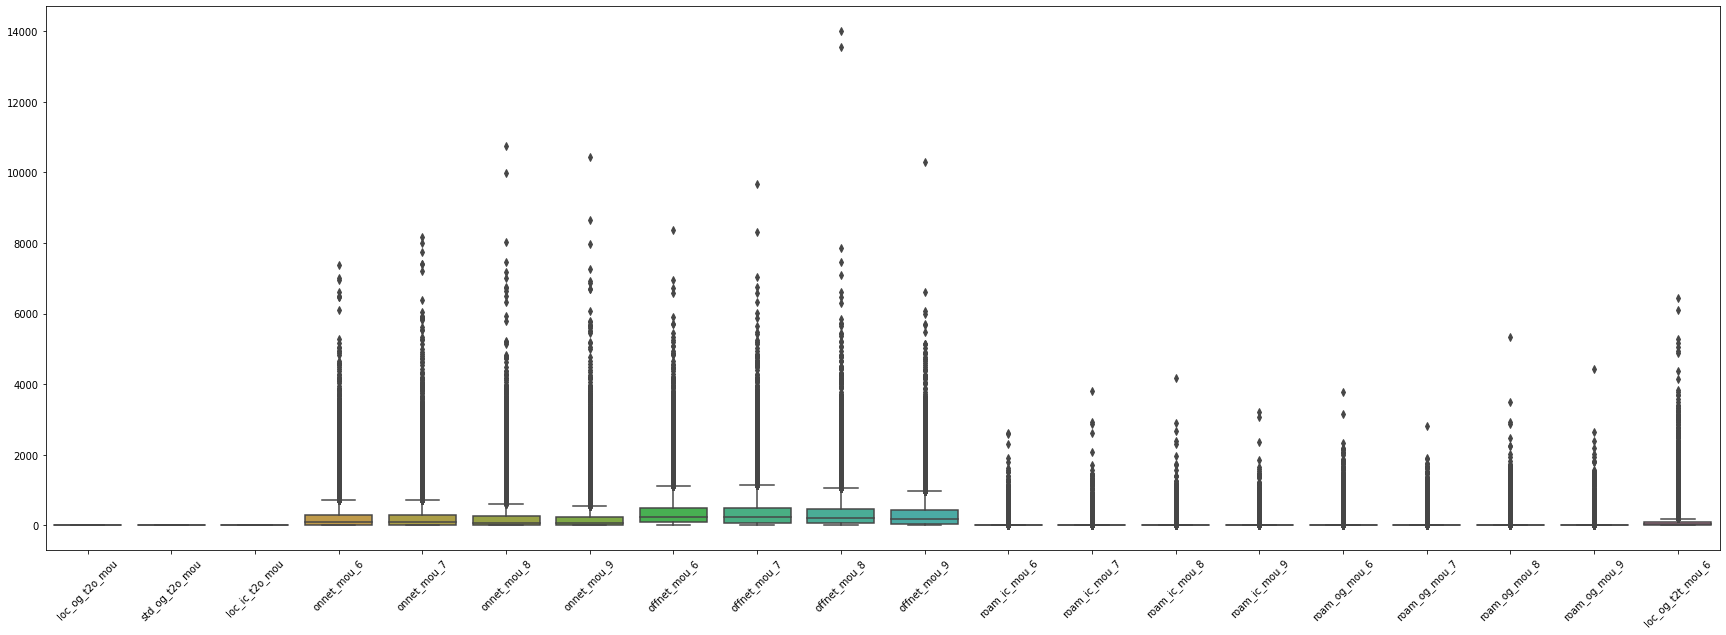

In [38]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[:20]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'loc_og_t2t_mou_7'),
 Text(0, 0, 'loc_og_t2t_mou_8'),
 Text(0, 0, 'loc_og_t2t_mou_9'),
 Text(0, 0, 'loc_og_t2m_mou_6'),
 Text(0, 0, 'loc_og_t2m_mou_7'),
 Text(0, 0, 'loc_og_t2m_mou_8'),
 Text(0, 0, 'loc_og_t2m_mou_9'),
 Text(0, 0, 'loc_og_t2f_mou_6'),
 Text(0, 0, 'loc_og_t2f_mou_7'),
 Text(0, 0, 'loc_og_t2f_mou_8'),
 Text(0, 0, 'loc_og_t2f_mou_9'),
 Text(0, 0, 'loc_og_t2c_mou_6'),
 Text(0, 0, 'loc_og_t2c_mou_7'),
 Text(0, 0, 'loc_og_t2c_mou_8'),
 Text(0, 0, 'loc_og_t2c_mou_9'),
 Text(0, 0, 'loc_og_mou_6'),
 Text(0, 0, 'loc_og_mou_7'),
 Text(0, 0, 'loc_og_mou_8'),
 Text(0, 0, 'loc_og_mou_9'),
 Text(0, 0, 'std_og_t2t_mou_6')]

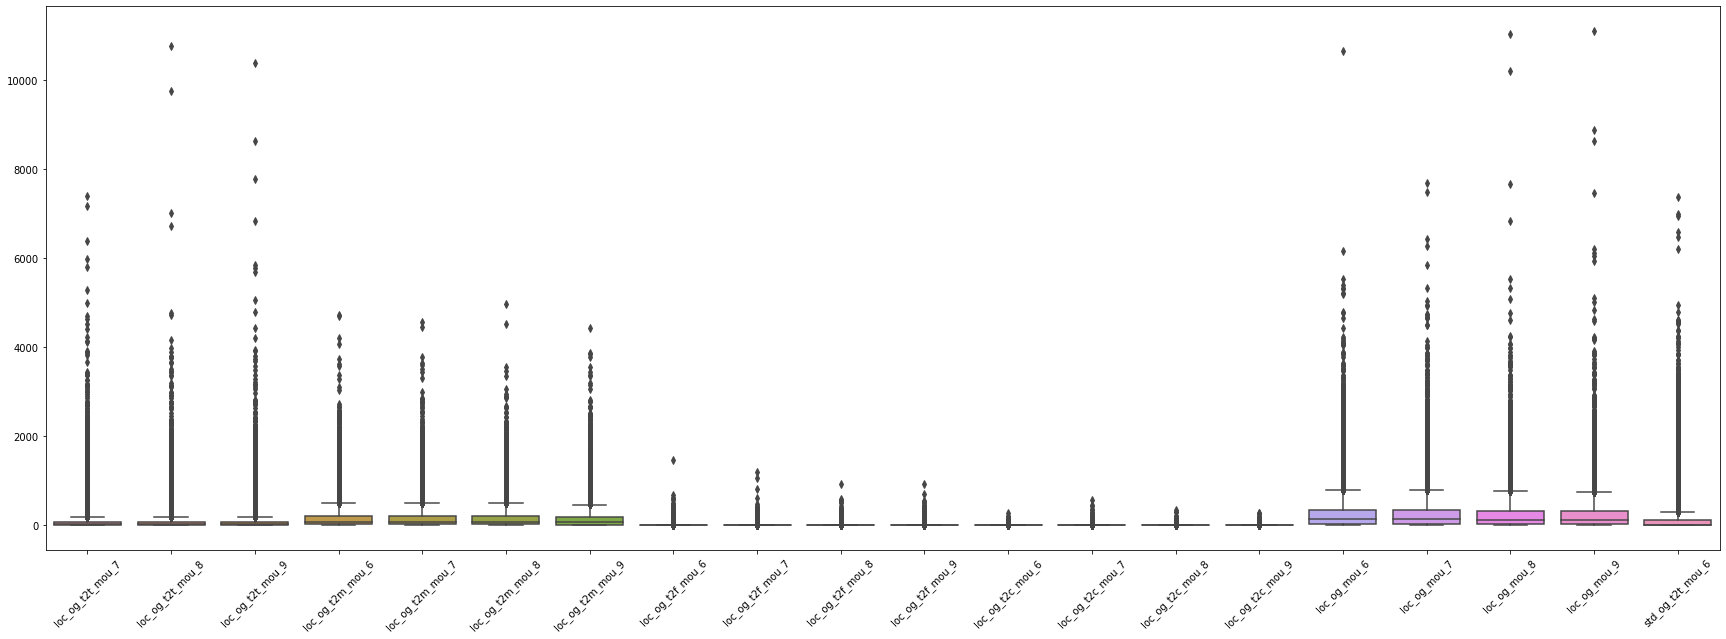

In [39]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[20:40]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'std_og_t2t_mou_7'),
 Text(0, 0, 'std_og_t2t_mou_8'),
 Text(0, 0, 'std_og_t2t_mou_9'),
 Text(0, 0, 'std_og_t2m_mou_6'),
 Text(0, 0, 'std_og_t2m_mou_7'),
 Text(0, 0, 'std_og_t2m_mou_8'),
 Text(0, 0, 'std_og_t2m_mou_9'),
 Text(0, 0, 'std_og_t2f_mou_6'),
 Text(0, 0, 'std_og_t2f_mou_7'),
 Text(0, 0, 'std_og_t2f_mou_8'),
 Text(0, 0, 'std_og_t2f_mou_9'),
 Text(0, 0, 'std_og_t2c_mou_6'),
 Text(0, 0, 'std_og_t2c_mou_7'),
 Text(0, 0, 'std_og_t2c_mou_8'),
 Text(0, 0, 'std_og_t2c_mou_9'),
 Text(0, 0, 'std_og_mou_6'),
 Text(0, 0, 'std_og_mou_7'),
 Text(0, 0, 'std_og_mou_8'),
 Text(0, 0, 'std_og_mou_9'),
 Text(0, 0, 'isd_og_mou_6')]

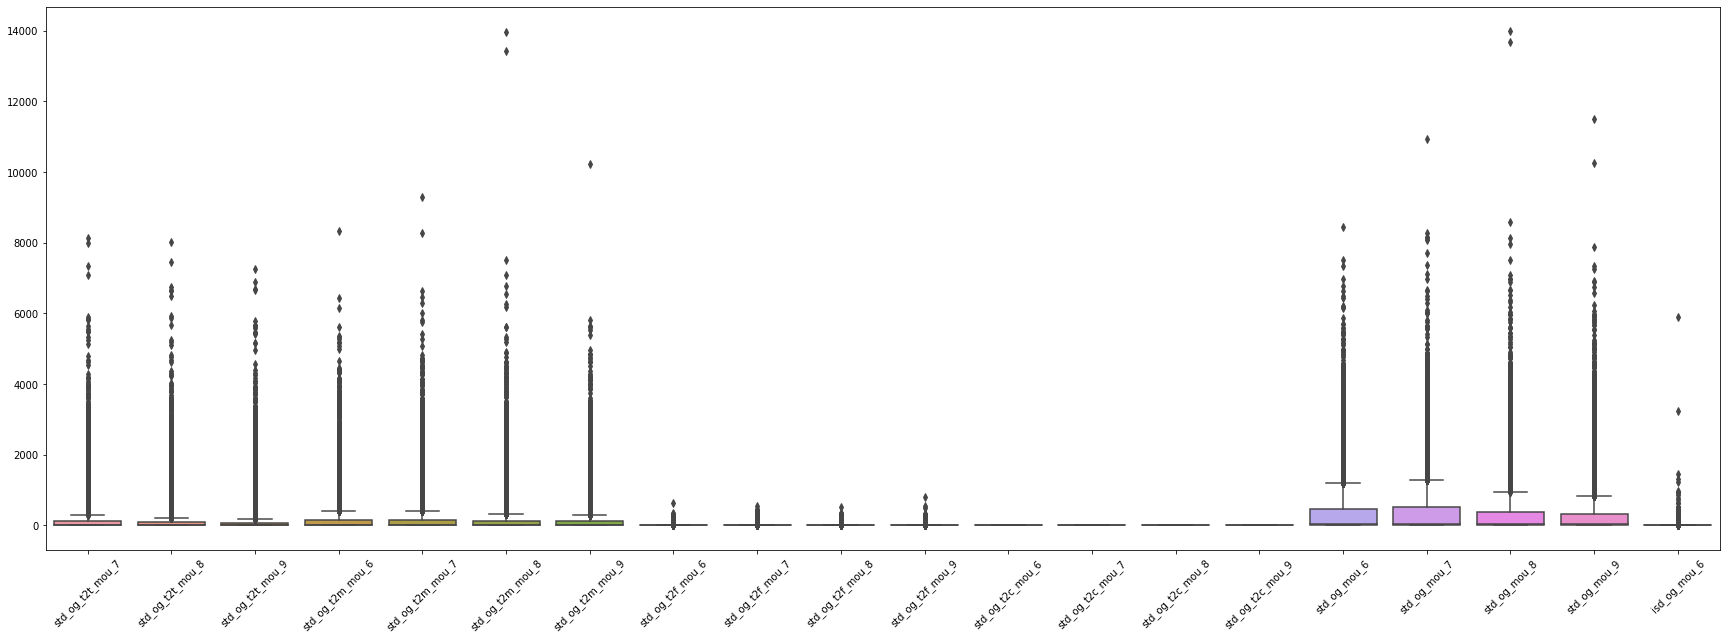

In [40]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[40:60]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'isd_og_mou_7'),
 Text(0, 0, 'isd_og_mou_8'),
 Text(0, 0, 'isd_og_mou_9'),
 Text(0, 0, 'spl_og_mou_6'),
 Text(0, 0, 'spl_og_mou_7'),
 Text(0, 0, 'spl_og_mou_8'),
 Text(0, 0, 'spl_og_mou_9'),
 Text(0, 0, 'og_others_6'),
 Text(0, 0, 'og_others_7'),
 Text(0, 0, 'og_others_8'),
 Text(0, 0, 'og_others_9'),
 Text(0, 0, 'loc_ic_t2t_mou_6'),
 Text(0, 0, 'loc_ic_t2t_mou_7'),
 Text(0, 0, 'loc_ic_t2t_mou_8'),
 Text(0, 0, 'loc_ic_t2t_mou_9'),
 Text(0, 0, 'loc_ic_t2m_mou_6'),
 Text(0, 0, 'loc_ic_t2m_mou_7'),
 Text(0, 0, 'loc_ic_t2m_mou_8'),
 Text(0, 0, 'loc_ic_t2m_mou_9'),
 Text(0, 0, 'loc_ic_t2f_mou_6')]

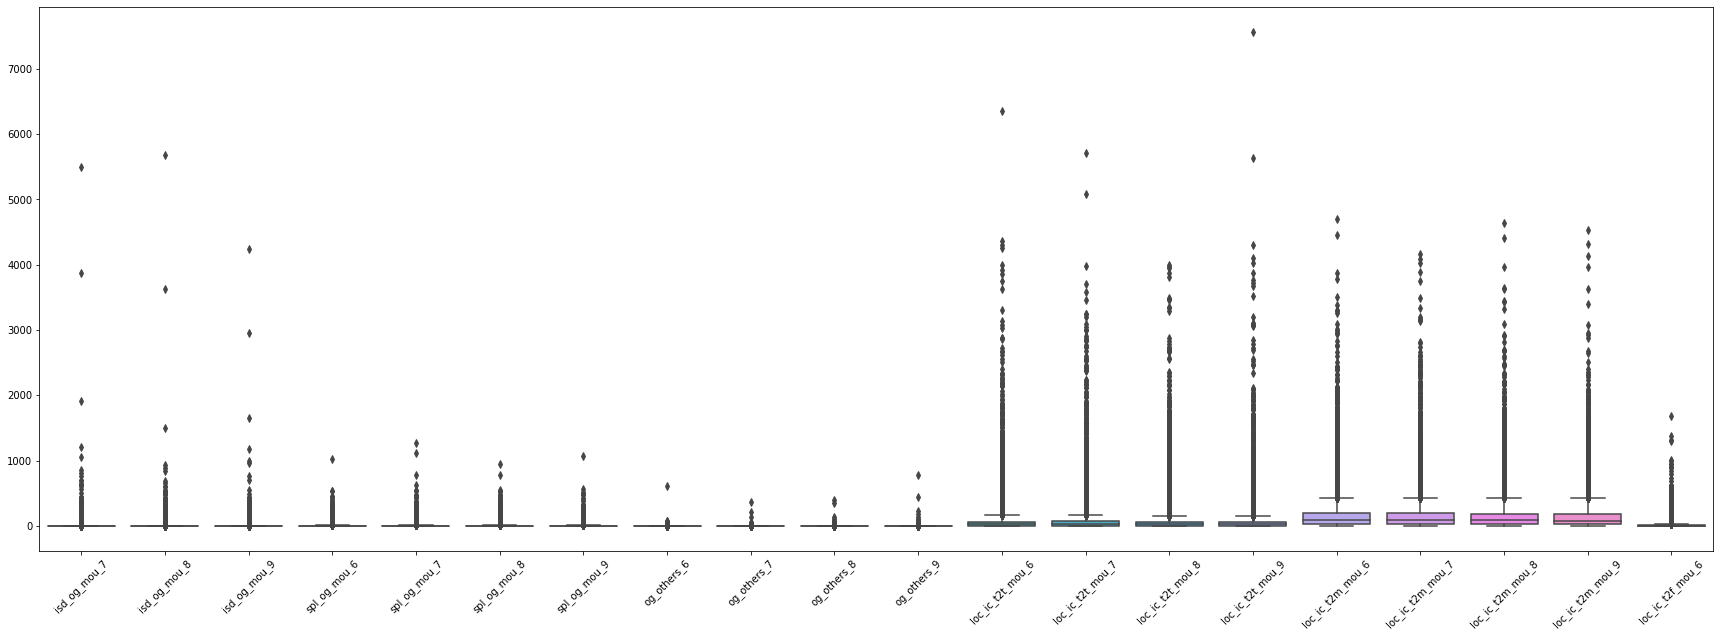

In [41]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[60:80]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'loc_ic_t2f_mou_7'),
 Text(0, 0, 'loc_ic_t2f_mou_8'),
 Text(0, 0, 'loc_ic_t2f_mou_9'),
 Text(0, 0, 'loc_ic_mou_6'),
 Text(0, 0, 'loc_ic_mou_7'),
 Text(0, 0, 'loc_ic_mou_8'),
 Text(0, 0, 'loc_ic_mou_9'),
 Text(0, 0, 'std_ic_t2t_mou_6'),
 Text(0, 0, 'std_ic_t2t_mou_7'),
 Text(0, 0, 'std_ic_t2t_mou_8'),
 Text(0, 0, 'std_ic_t2t_mou_9'),
 Text(0, 0, 'std_ic_t2m_mou_6'),
 Text(0, 0, 'std_ic_t2m_mou_7'),
 Text(0, 0, 'std_ic_t2m_mou_8'),
 Text(0, 0, 'std_ic_t2m_mou_9'),
 Text(0, 0, 'std_ic_t2f_mou_6'),
 Text(0, 0, 'std_ic_t2f_mou_7'),
 Text(0, 0, 'std_ic_t2f_mou_8'),
 Text(0, 0, 'std_ic_t2f_mou_9'),
 Text(0, 0, 'std_ic_t2o_mou_6')]

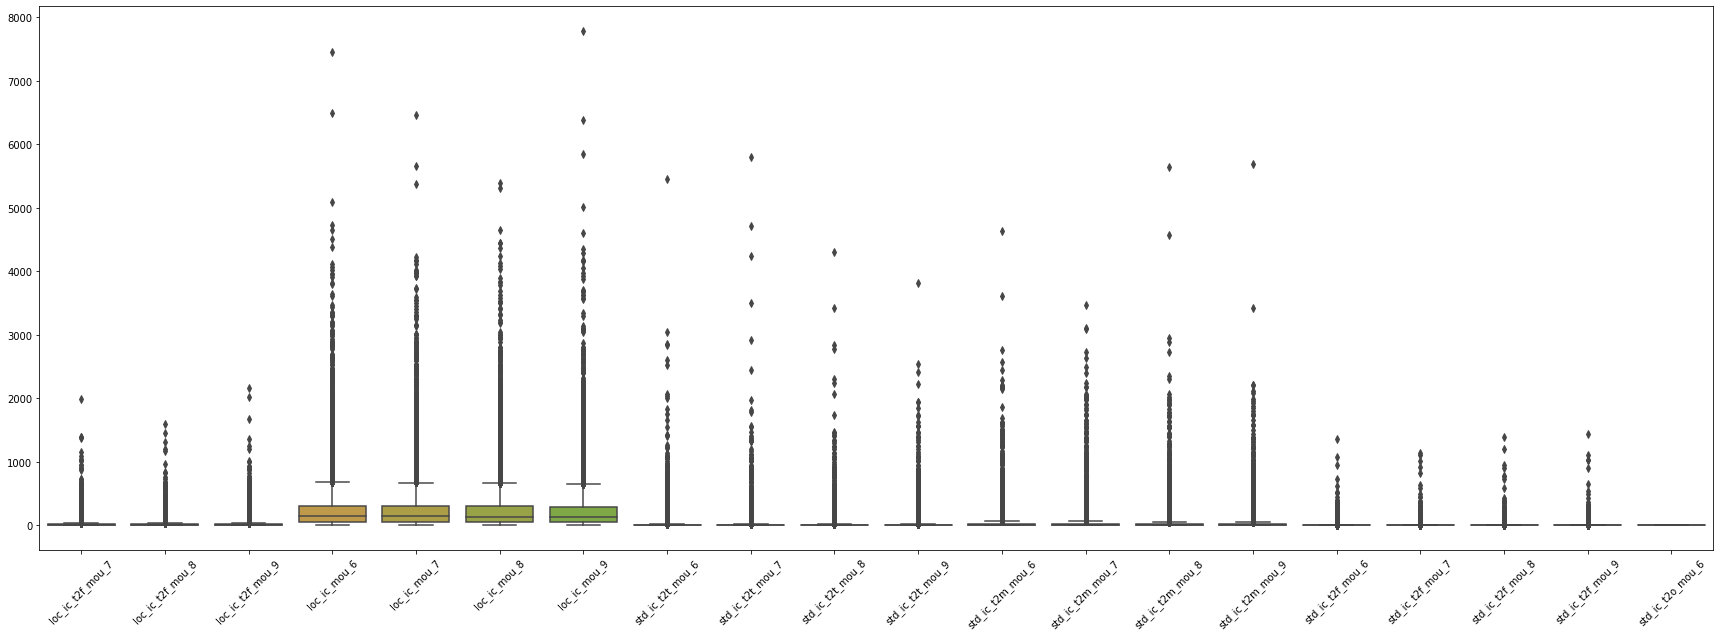

In [42]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[80:100]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'std_ic_t2o_mou_7'),
 Text(0, 0, 'std_ic_t2o_mou_8'),
 Text(0, 0, 'std_ic_t2o_mou_9'),
 Text(0, 0, 'std_ic_mou_6'),
 Text(0, 0, 'std_ic_mou_7'),
 Text(0, 0, 'std_ic_mou_8'),
 Text(0, 0, 'std_ic_mou_9'),
 Text(0, 0, 'spl_ic_mou_6'),
 Text(0, 0, 'spl_ic_mou_7'),
 Text(0, 0, 'spl_ic_mou_8'),
 Text(0, 0, 'spl_ic_mou_9'),
 Text(0, 0, 'isd_ic_mou_6'),
 Text(0, 0, 'isd_ic_mou_7'),
 Text(0, 0, 'isd_ic_mou_8'),
 Text(0, 0, 'isd_ic_mou_9'),
 Text(0, 0, 'ic_others_6'),
 Text(0, 0, 'ic_others_7'),
 Text(0, 0, 'ic_others_8'),
 Text(0, 0, 'ic_others_9'),
 Text(0, 0, 'max_rech_data_6')]

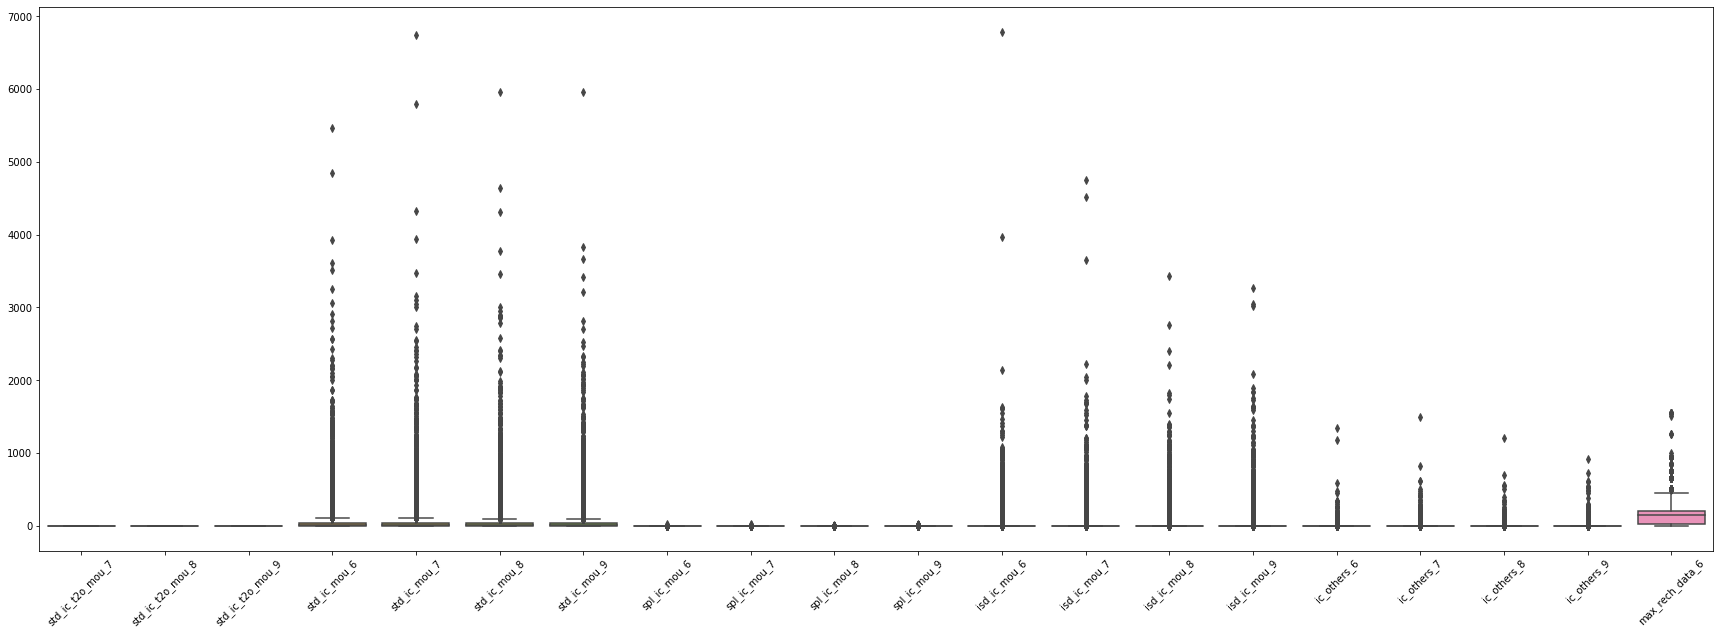

In [43]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[100:120]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'max_rech_data_7'),
 Text(0, 0, 'max_rech_data_8'),
 Text(0, 0, 'max_rech_data_9'),
 Text(0, 0, 'count_rech_2g_6'),
 Text(0, 0, 'count_rech_2g_7'),
 Text(0, 0, 'count_rech_2g_8'),
 Text(0, 0, 'count_rech_2g_9'),
 Text(0, 0, 'count_rech_3g_6'),
 Text(0, 0, 'count_rech_3g_7'),
 Text(0, 0, 'count_rech_3g_8'),
 Text(0, 0, 'count_rech_3g_9'),
 Text(0, 0, 'arpu_3g_6'),
 Text(0, 0, 'arpu_3g_7'),
 Text(0, 0, 'arpu_3g_8'),
 Text(0, 0, 'arpu_3g_9'),
 Text(0, 0, 'arpu_2g_6'),
 Text(0, 0, 'arpu_2g_7'),
 Text(0, 0, 'arpu_2g_8'),
 Text(0, 0, 'arpu_2g_9'),
 Text(0, 0, 'night_pck_user_6')]

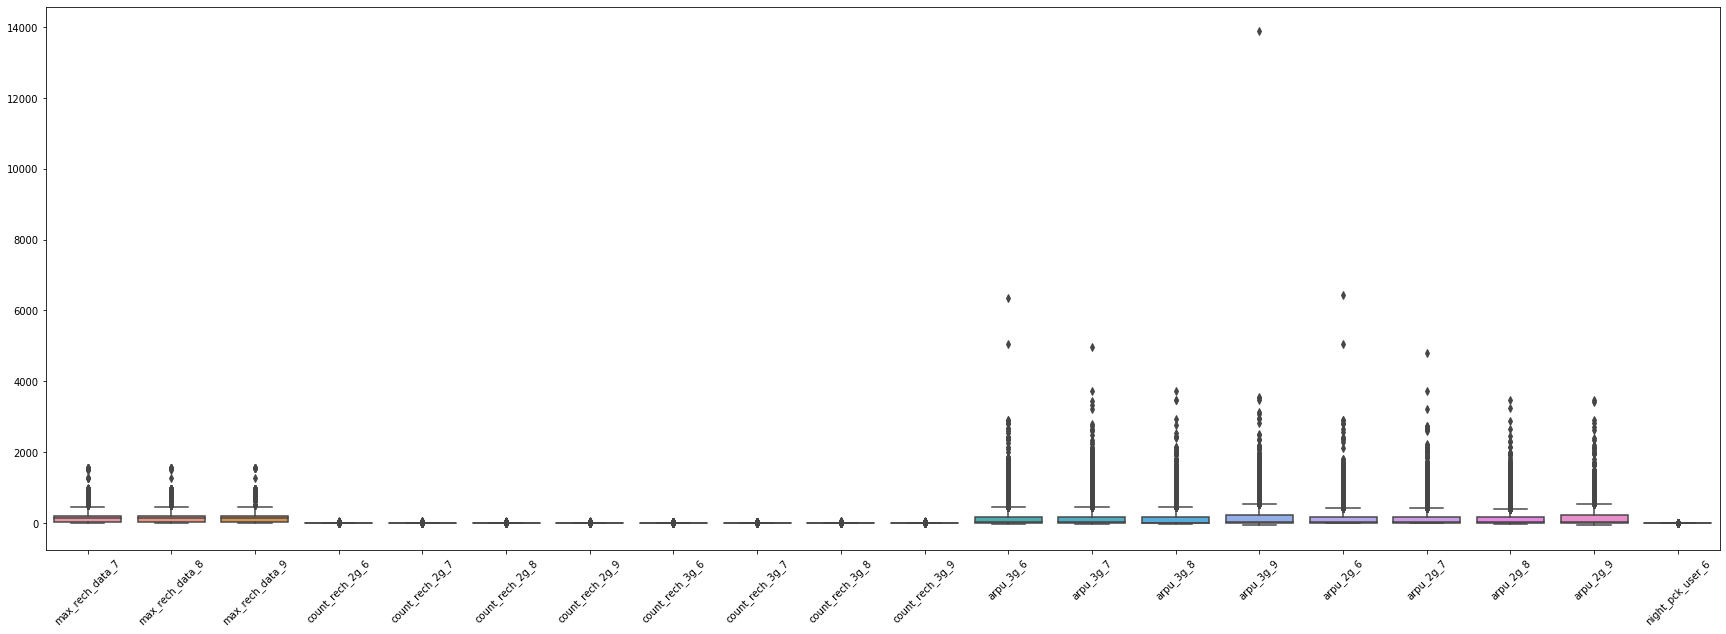

In [44]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[120:140]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'night_pck_user_7'),
 Text(0, 0, 'night_pck_user_8'),
 Text(0, 0, 'night_pck_user_9'),
 Text(0, 0, 'fb_user_6'),
 Text(0, 0, 'fb_user_7'),
 Text(0, 0, 'fb_user_8'),
 Text(0, 0, 'fb_user_9'),
 Text(0, 0, 'total_amt_recharge_6'),
 Text(0, 0, 'total_amt_recharge_7'),
 Text(0, 0, 'total_amt_recharge_8'),
 Text(0, 0, 'total_amt_recharge_9')]

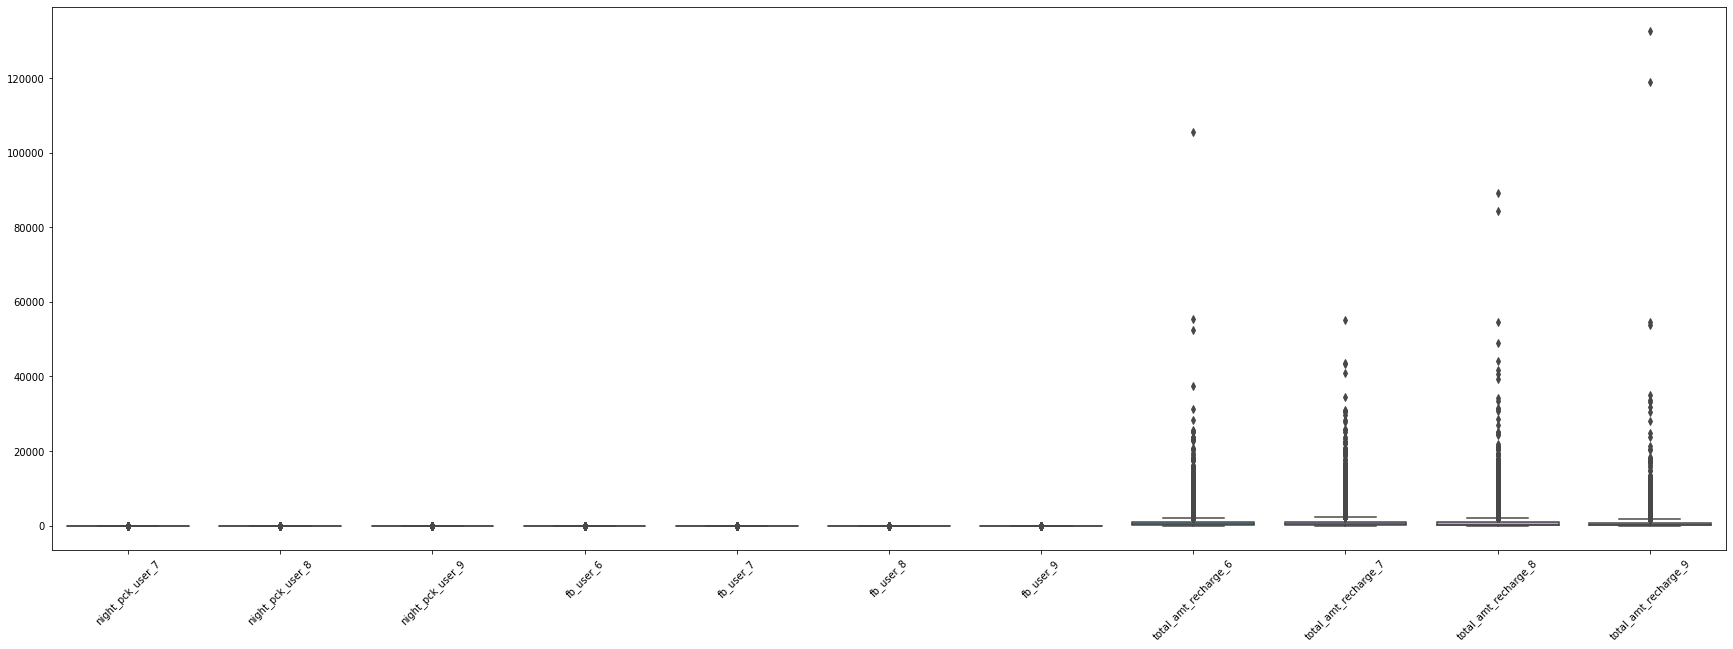

In [45]:
plt.figure(figsize = (30,10)) 
ax=sns.boxplot(data=churn_high_val_cust[cols_explore[140:160]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [46]:
#Get all float columns
churn_high_val_cust.select_dtypes(include=['float64']).columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [47]:
#Get all int columns
churn_high_val_cust.select_dtypes(include=['int64']).columns.tolist()

['mobile_number',
 'circle_id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'churn']

In [48]:
#Get all data columns to impute
columnstoImpute = ['total_rech_data_6'           
,'total_rech_data_7'           
,'total_rech_data_8'           
,'total_rech_data_9'
,'max_rech_data_6'             
,'max_rech_data_7'             
,'max_rech_data_8'             
,'max_rech_data_9'             
,'count_rech_2g_6'             
,'count_rech_2g_7'             
,'count_rech_2g_8'            
,'count_rech_2g_9'             
,'count_rech_3g_6'             
,'count_rech_3g_7'             
,'count_rech_3g_8'             
,'count_rech_3g_9'             
,'av_rech_amt_data_6'          
,'av_rech_amt_data_7'          
,'av_rech_amt_data_8'          
,'av_rech_amt_data_9'          
,'arpu_3g_6'                   
,'arpu_3g_7'                   
,'arpu_3g_8'                   
,'arpu_3g_9'                   
,'arpu_2g_6'                   
,'arpu_2g_7'                   
,'arpu_2g_8'                  
,'arpu_2g_9']

In [49]:
#Impute the null values with 0 for all data columns
churn_high_val_cust[columnstoImpute] = churn_high_val_cust[columnstoImpute].fillna(0, axis=1)

In [50]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
6        last_date_of_month_7     99.91
7        last_date_of_month_8     99.45
220                 fb_user_9     49.27
200          night_pck_user_9     49.27
160  date_of_last_rech_data_9     49.27
228      total_amt_recharge_9     49.27
227      total_amt_recharge_8     46.83
199          night_pck_user_8     46.83
159  date_of_last_rech_data_8     46.83
219                 fb_user_8     46.83
225      total_amt_recharge_6     44.15
217                 fb_user_6     44.15
157  date_of_last_rech_data_6     44.15
197          night_pck_user_6     44.15
226      total_amt_recharge_7     43.15
218                 fb_user_7     43.15
158  date_of_last_rech_data_7     43.15
198          night_pck_user_7     43.15
40           loc_og_t2f_mou_9      6.34
120              std_ic_mou_9      6.34
80                og_others_9      6.34
44           loc_og_t2c_mou_9      6.34
52           std_og_t2t_mou_9      6.34
76               spl_og_mou_9      6.34
48               loc_og_mou_9      6.34
72               isd_og_mou_9      6.34
132              isd_ic_mou_9      6.34
136               ic_others_9      6.34
68               std_og_mou_9      6.34
56           std_og_t2m_mou_9      6.34
128              spl_ic_mou_9      6.34
64           std_og_t2c_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
112          std_ic_t2f_mou_9      6.34
88           loc_ic_t2t_mou_9      6.34
116          std_ic_t2o_mou_9      6.34
20               offnet_mou_9      6.34
104          std_ic_t2t_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
24              roam_ic_mou_9      6.34
16                onnet_mou_9      6.34
100              loc_ic_mou_9      6.34
28              roam_og_mou_9      6.34
92           loc_ic_t2m_mou_9      6.34
60           std_og_t2f_mou_9      6.34
108          std_ic_t2m_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
67               std_og_mou_8      3.91
103          std_ic_t2t_mou_8      3.91
127              spl_ic_mou_8      3.91
107          std_ic_t2m_mou_8      3.91
75               spl_og_mou_8      3.91
71               isd_og_mou_8      3.91
99               loc_ic_mou_8      3.91
87           loc_ic_t2t_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
79                og_others_8      3.91
95           loc_ic_t2f_mou_8      3.91
119              std_ic_mou_8      3.91
63           std_og_t2c_mou_8      3.91
91           loc_ic_t2m_mou_8      3.91
55           std_og_t2m_mou_8      3.91
15                onnet_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
27              roam_og_mou_8      3.91
135               ic_others_8      3.91
39           loc_og_t2f_mou_8      3.91
23              roam_ic_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
19               offnet_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
47               loc_og_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
131              isd_ic_mou_8      3.91
59           std_og_t2f_mou_8      3.91
51           std_og_t2t_mou_8      3.91
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
21              roam_ic_mou_6      1.82
97               loc_ic_mou_6      1.82
113          std_ic_t2o_mou_6      1.82
17               offnet_mou_6      1.82
25              roam_og_mou_6      1.82
13                onnet_mou_6      1.82
105          std_ic_t2m_mou_6      1.82
109          std_ic_t2f_mou_6      1.82
93           loc_ic_t2f_mou_6      1.82
101          std_ic_t2t_mou_6      1.82
29           loc_og_t2t_mou_6      1.82
117              std_ic_mou_6      1.82
61           std_og_t2c_mou_6      1.82
89           loc_ic_t2m_mou_6      1.82
133               ic_others_6      1.82
65               std_og_mou_6      1.82
57           std_og_t2f_mou_6      1.82
69               isd_og_mou_6      1.82
53           std_og_t2m_mou_6      1.82
49           std_og_t2t_mou_6      1.82
73               spl_og_mou_6      1.82
33           loc_og_t2

night_pack_user and fb_user are categorical variables where 1 indicates usage of the service and null indicates no usage. Lets impute the missing values with -1 and convert the type to category

In [51]:
#Impute the missing values and convert the features to category
churn_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=churn_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: -1 if pd.isnull(x) else 1)
churn_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = churn_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))

In [52]:
churn_high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
21               -1               -1               -1        -1        -1   
23               -1                1                1        -1         1   

   fb_user_8  
0          1  
7         -1  
8          1  
21        -1  
23         1

In [53]:
#Get all the data when loc_og_t20_mou are nulls
churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2o_mou'])]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
687       7001662284        109             nan             nan   
2185      7000237332        109             nan             nan   
3154      7000606599        109             nan             nan   
4190      7000293582        109             nan             nan   
5175      7002074759        109             nan             nan   
5220      7000635396        109             nan             nan   
5539      7001126462        109             nan             nan   
6393      7002026764        109             nan             nan   
6567      7001848388        109             nan             nan   
6946      7002368732        109             nan             nan   
6984      7001738538        109             nan             nan   
8265      7000144821        109             nan             nan   
8363      7000604685        109             nan             nan   
8975      7000822092        109             nan             nan   
9518      7002391910        109             nan             nan   
9852      7000969482        109             nan             nan   
10879     7001588698        109             nan             nan   
11364     7000746562        109             nan             nan   
11626     7000145218        109             nan             nan   
12154     7000977670        109             nan             nan   
12996     7000452408        109             nan             nan   
13039     7001097628        109             nan             nan   
13289     7000801224        109             nan             nan   
13351     7000648567        109             nan             nan   
14191     7001546710        109             nan             nan   
14458     7001731526        109             nan             nan   
15294     7000017705        109             nan             nan   
15473     7000041735        109             nan             nan   
15858     7000604772        109             nan             nan   
17752     7000517729        109             nan             nan   
17968     7001135323        109             nan             nan   
19071     7000804932        109             nan             nan   
19354     7000717449        109             nan             nan   
19415     7000164130        109             nan             nan   
19531     7000200593        109             nan             nan   
19564     7000455953        109             nan             nan   
19971     7001962890        109             nan             nan   
20780     7001881970        109             nan             nan   
20907     7001590745        109             nan             nan   
21030     7001924905        109             nan             nan   
21259     7002198903        109             nan             nan   
21611     7000508232        109             nan             nan   
21925     7001601621        109             nan             nan   
22781     7000441141        109             nan             nan   
23278     7001591982        109             nan             nan   
24091     7001037390        109             nan             nan   
25471     7001101668        109             nan             nan   
25599     7002408423        109             nan             nan   
25647     7000121522        109             nan             nan   
26622     7000404584        109             nan             nan   
26902     7000603259        109             nan             nan   
28350     7001975086        109             nan             nan   
29404     7001786503        109             nan             nan   
30524     7002159687        109             nan             nan   
31024     7001238664        109             nan             nan   
31058     7000447866        109             nan             nan   
31602     7000365381        109             nan             nan   
33018     7001385743        109             nan             nan   
33036     7000800656        109             nan       

'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' are having same null% and are from same customers. 
So lets impute them with 0

In [54]:
#Impute 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' columns with 0's
churn_high_val_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = churn_high_val_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0, axis=1)

In [55]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
6        last_date_of_month_7     99.91
7        last_date_of_month_8     99.45
200          night_pck_user_9     49.27
160  date_of_last_rech_data_9     49.27
220                 fb_user_9     49.27
228      total_amt_recharge_9     49.27
159  date_of_last_rech_data_8     46.83
227      total_amt_recharge_8     46.83
157  date_of_last_rech_data_6     44.15
225      total_amt_recharge_6     44.15
158  date_of_last_rech_data_7     43.15
226      total_amt_recharge_7     43.15
108          std_ic_t2m_mou_9      6.34
92           loc_ic_t2m_mou_9      6.34
112          std_ic_t2f_mou_9      6.34
48               loc_og_mou_9      6.34
80                og_others_9      6.34
44           loc_og_t2c_mou_9      6.34
128              spl_ic_mou_9      6.34
56           std_og_t2m_mou_9      6.34
36           loc_og_t2m_mou_9      6.34
52           std_og_t2t_mou_9      6.34
68               std_og_mou_9      6.34
88           loc_ic_t2t_mou_9      6.34
60           std_og_t2f_mou_9      6.34
120              std_ic_mou_9      6.34
64           std_og_t2c_mou_9      6.34
32           loc_og_t2t_mou_9      6.34
72               isd_og_mou_9      6.34
116          std_ic_t2o_mou_9      6.34
76               spl_og_mou_9      6.34
96           loc_ic_t2f_mou_9      6.34
40           loc_og_t2f_mou_9      6.34
104          std_ic_t2t_mou_9      6.34
132              isd_ic_mou_9      6.34
20               offnet_mou_9      6.34
136               ic_others_9      6.34
16                onnet_mou_9      6.34
24              roam_ic_mou_9      6.34
100              loc_ic_mou_9      6.34
28              roam_og_mou_9      6.34
59           std_og_t2f_mou_8      3.91
19               offnet_mou_8      3.91
87           loc_ic_t2t_mou_8      3.91
103          std_ic_t2t_mou_8      3.91
79                og_others_8      3.91
63           std_og_t2c_mou_8      3.91
55           std_og_t2m_mou_8      3.91
75               spl_og_mou_8      3.91
119              std_ic_mou_8      3.91
67               std_og_mou_8      3.91
15                onnet_mou_8      3.91
71               isd_og_mou_8      3.91
31           loc_og_t2t_mou_8      3.91
107          std_ic_t2m_mou_8      3.91
43           loc_og_t2c_mou_8      3.91
115          std_ic_t2o_mou_8      3.91
35           loc_og_t2m_mou_8      3.91
131              isd_ic_mou_8      3.91
95           loc_ic_t2f_mou_8      3.91
111          std_ic_t2f_mou_8      3.91
39           loc_og_t2f_mou_8      3.91
99               loc_ic_mou_8      3.91
135               ic_others_8      3.91
27              roam_og_mou_8      3.91
127              spl_ic_mou_8      3.91
47               loc_og_mou_8      3.91
91           loc_ic_t2m_mou_8      3.91
51           std_og_t2t_mou_8      3.91
23              roam_ic_mou_8      3.91
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
105          std_ic_t2m_mou_6      1.82
97               loc_ic_mou_6      1.82
85           loc_ic_t2t_mou_6      1.82
113          std_ic_t2o_mou_6      1.82
109          std_ic_t2f_mou_6      1.82
89           loc_ic_t2m_mou_6      1.82
93           loc_ic_t2f_mou_6      1.82
101          std_ic_t2t_mou_6      1.82
53           std_og_t2m_mou_6      1.82
77                og_others_6      1.82
41           loc_og_t2c_mou_6      1.82
13                onnet_mou_6      1.82
17               offnet_mou_6      1.82
21              roam_ic_mou_6      1.82
133               ic_others_6      1.82
25              roam_og_mou_6      1.82
29           loc_og_t2t_mou_6      1.82
33           loc_og_t2m_mou_6      1.82
37           loc_og_t2f_mou_6      1.82
73               spl_og_mou_6      1.82
129              isd_ic_mou_6      1.82
45               loc_og_mou_6      1.82
49           std_og_t2t_mou_6      1.82
125              spl_ic_mou_6      1.82
57           std_og_t2f_mou_6      1.82
61           std_og_t2c_mou_6      1.82
65               std_og_mou_6      1.82
69               isd_o

In [56]:
#Get all the columns having null values when loc_og_t2c_mou_6 is having null value
churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_6'])].columns[churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_6'])].isna().all()].tolist()

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [57]:
#Get all the columns having null values when loc_og_t2c_mou_7 is having null value
churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_7'])].columns[churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_7'])].isna().all()].tolist()

['onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']

In [58]:
#Get all the columns having null values when loc_og_t2c_mou_8 is having null value
churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_8'])].columns[churn_high_val_cust[pd.isnull(churn_high_val_cust['loc_og_t2c_mou_8'])].isna().all()].tolist()

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [59]:
#Lets check if any of the rows having all data or call columns with null values 
churn_high_val_cust.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'last_date_of_month_9','rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8'], axis=1).isna().all()

loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2t_mou_9            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou

Since none of the rows exist where all the date and call columns are having null values. So the null values are independent of data and calls and support our earlier assumption that the null values indicate no usage of service rather than having missing values and so can be imputed by zeros.

In [60]:
#Exclude the date and category columns from the dataset and impute with 0
churn_high_val_cust[churn_high_val_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = churn_high_val_cust[churn_high_val_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [61]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((churn_high_val_cust.isnull().sum()/len(churn_high_val_cust))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
6        last_date_of_month_7     99.91
7        last_date_of_month_8     99.45
160  date_of_last_rech_data_9     49.27
159  date_of_last_rech_data_8     46.83
157  date_of_last_rech_data_6     44.15
158  date_of_last_rech_data_7     43.15
152       date_of_last_rech_9      2.72
151       date_of_last_rech_8      1.94
8        last_date_of_month_9      1.22
150       date_of_last_rech_7      0.33
149       date_of_last_rech_6      0.24
161         total_rech_data_6      0.00
155        last_day_rch_amt_8      0.00
156        last_day_rch_amt_9      0.00
163         total_rech_data_8      0.00
154        last_day_rch_amt_7      0.00
153        last_day_rch_amt_6      0.00
162         total_rech_data_7      0.00
0               mobile_number      0.00
164         total_rech_data_9      0.00
166           max_rech_data_7      0.00
167           max_rech_data_8      0.00
168           max_rech_data_9      0.00
169           count_rech_2g_6      0.00
170           count_rech_2g_7      0.00
171           count_rech_2g_8      0.00
172           count_rech_2g_9      0.00
173           count_rech_3g_6      0.00
174           count_rech_3g_7      0.00
175           count_rech_3g_8      0.00
176           count_rech_3g_9      0.00
165           max_rech_data_6      0.00
147            max_rech_amt_8      0.00
148            max_rech_amt_9      0.00
178        av_rech_amt_data_7      0.00
122            total_ic_mou_7      0.00
123            total_ic_mou_8      0.00
124            total_ic_mou_9      0.00
125              spl_ic_mou_6      0.00
126              spl_ic_mou_7      0.00
127              spl_ic_mou_8      0.00
128              spl_ic_mou_9      0.00
129              isd_ic_mou_6      0.00
130              isd_ic_mou_7      0.00
131              isd_ic_mou_8      0.00
132              isd_ic_mou_9      0.00
133               ic_others_6      0.00
134               ic_others_7      0.00
135               ic_others_8      0.00
136               ic_others_9      0.00
137          total_rech_num_6      0.00
138          total_rech_num_7      0.00
139          total_rech_num_8      0.00
140          total_rech_num_9      0.00
141          total_rech_amt_6      0.00
142          total_rech_amt_7      0.00
143          total_rech_amt_8      0.00
144          total_rech_amt_9      0.00
145            max_rech_amt_6      0.00
146            max_rech_amt_7      0.00
177        av_rech_amt_data_6      0.00
180        av_rech_amt_data_9      0.00
179        av_rech_amt_data_8      0.00
222                  vbc_3g_7      0.00
210              monthly_3g_7      0.00
211              monthly_3g_8      0.00
212              monthly_3g_9      0.00
213               sachet_3g_6      0.00
214               sachet_3g_7      0.00
215               sachet_3g_8      0.00
216               sachet_3g_9      0.00
217                 fb_user_6      0.00
218                 fb_user_7      0.00
219                 fb_user_8      0.00
220                 fb_user_9      0.00
221                  vbc_3g_8      0.00
223                  vbc_3g_6      0.00
120              std_ic_mou_9      0.00
224                  vbc_3g_9      0.00
225      total_amt_recharge_6      0.00
226      total_amt_recharge_7      0.00
227      total_amt_recharge_8      0.00
228      total_amt_recharge_9      0.00
229                   aon_mon      0.00
230                     churn      0.00
231                rech_amt_6      0.00
232                rech_amt_7      0.00
233                rech_amt_8      0.00
234               rech_data_6      0.00
235               rech_data_7      0.00
209              monthly_3g_6      0.00
208               sachet_2g_9      0.00
207               sachet_2g_8      0.00
206               sachet_2g_7      0.00
181               vol_2g_mb_6      0.00
182               vol_2g_mb_7      0.00
183               vol_2g_mb_8      0.00
184               vol_2g_mb_9      0.00
185               vol_3g_mb_6      0.00
186               vol_

In [62]:
#Get all the columns ending with 9. All the columns of month 9
month_9_cols = [col for col in churn_high_val_cust.columns if '9' in col]
month_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [63]:
#Remove the month 9 columns since they are not necessary for prediction
churn_high_val_cust = churn_high_val_cust.drop(month_9_cols, axis=1)

In [64]:
#Get the mterics of all numeric columns
churn_high_val_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       30001.00   30001.00        30001.00        30001.00   
mean   7001206159.56     109.00            0.00            0.00   
std        690878.42       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000609293.00     109.00            0.00            0.00   
50%    7001203434.00     109.00            0.00            0.00   
75%    7001803773.00     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
count        30001.00 30001.00 30001.00 30001.00     30001.00     30001.00   
mean             0.00   558.49   560.78   508.60       260.79       267.82   
std              0.00   460.64   479.78   501.96       459.64       479.99   
min              0.00 -2258.71 -2014.05  -945.81         0.00         0.00   
25%              0.00   309.87   309.83   231.47        17.08        16.03   
50%              0.00   481.69   480.94   427.58        84.58        82.81   
75%              0.00   699.94   698.32   661.49       290.44       290.24   
max              0.00 27731.09 35145.83 33543.62      7376.71      8157.78   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count     30001.00      30001.00      30001.00      30001.00       30001.00   
mean        234.11        373.69        378.10        335.08          16.11   
std         458.45        482.52        498.92        482.06          76.30   
min           0.00          0.00          0.00          0.00           0.00   
25%          10.39         71.61         69.91         46.74           0.00   
50%          65.61        222.54        220.03        182.79           0.00   
75%         239.96        487.94        494.01        438.89           0.00   
max       10752.56       8362.36       9667.13      14007.34        2613.31   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count       30001.00       30001.00       30001.00       30001.00   
mean           12.64          12.50          26.57          20.15   
std            75.79          74.13         116.21          96.10   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          3813.29        4169.81        3775.11        2812.04   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count       30001.00          30001.00          30001.00          30001.00   
mean           19.87             84.48             85.67             78.08   
std           104.72            228.79            240.53            227.37   
min             0.00              0.00              0.00              0.00   
25%             0.00              4.38              4.61              2.53   
50%             0.00             24.33             24.68             20.73   
75%             0.00             77.98             78.34             72.04   
max          5337.04           6431.33           7400.66          10752.56   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean             163.24            163.01            151.76              6.34   
std              250.12            241.58            233.66             22.12   
min                0.00              0.00              0.00              0.00   
25%               19.21             20.46             13.09              0.00   
50%               77.18             78.88             67.76              0.00   
75%              208.93            208.41            196.96              4.23   
max            

The columns 'mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8' have no new information to provide to the learning algorithm so lets drop them.

In [65]:
#Drop the columns
churn_high_val_cust = churn_high_val_cust.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [66]:
#Get the metrics of remaining columns
churn_high_val_cust.describe()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00   
mean    558.49   560.78   508.60       260.79       267.82       234.11   
std     460.64   479.78   501.96       459.64       479.99       458.45   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
25%     309.87   309.83   231.47        17.08        16.03        10.39   
50%     481.69   480.94   427.58        84.58        82.81        65.61   
75%     699.94   698.32   661.49       290.44       290.24       239.96   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         373.69        378.10        335.08          16.11          12.64   
std          482.52        498.92        482.06          76.30          75.79   
min            0.00          0.00          0.00           0.00           0.00   
25%           71.61         69.91         46.74           0.00           0.00   
50%          222.54        220.03        182.79           0.00           0.00   
75%          487.94        494.01        438.89           0.00           0.00   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean           12.50          26.57          20.15          19.87   
std            74.13         116.21          96.10         104.72   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean              84.48             85.67             78.08            163.24   
std              228.79            240.53            227.37            250.12   
min                0.00              0.00              0.00              0.00   
25%                4.38              4.61              2.53             19.21   
50%               24.33             24.68             20.73             77.18   
75%               77.98             78.34             72.04            208.93   
max             6431.33           7400.66          10752.56           4729.74   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          30001.00          30001.00          30001.00          30001.00   
mean             163.01            151.76              6.34              6.42   
std              241.58            233.66             22.12             21.94   
min                0.00              0.00              0.00              0.00   
25%               20.46             13.09              0.00              0.00   
50%               78.88             67.76              0.00              0.10   
75%              208.41            196.96              4.23              4.38   
max             4557.14           4961.33           1466.03           1196.43   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          30001.00          30001.00          30001.00          30001.00   
mean               5.89              1.58              1.89              1.71   
std               19.50              6.30              9.16              7.21   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%                0.00           

The columns roam_ic_mou, roam_og_mou, loc_og_t2f_mou, loc_og_t2c_mou, loc_og_t2c_mou, std_og_t2f_mou, isd_og_mou, spl_og_mou, og_others, std_ic_t2f_mou, spl_ic_mou, isd_ic_mou, ic_others, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, vol_2g_mb, vol_3g_mb, arpu_3g, arpu_2g, night_pck_user, monthly_2g, monthly_sachet_2g, monthly_3g,montlhy_sachet_3g, fbb_user, vbc_3g all are having values 0 for more than 50% of datapoints. 
So lets create a new dataframe to have totals of all three months for respective features

In [67]:
#Create a new dataframe
total_data = pd.DataFrame()

In [68]:
#Get columns excluding date columns
cols = churn_high_val_cust.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()

In [69]:
#Remove aon and churn columns
cols.remove('aon_mon')
cols.remove('churn')

In [70]:
#Create an empty list
sublist=[]

#Get the columns names removing last two characters
for col in cols:
    sublist.append(col[:-2])

In [71]:
#Import ordered dict package
from collections import OrderedDict

#Get unique column names after removing last two characters into a list
collist=[]
collist=list(OrderedDict.fromkeys(sublist))
collist

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_amt_recharge']

In [72]:
#Loop through all the unique features, append 6,7,8 and add the totals to the new dataframe
for col in collist:
    total_data['total_'+col] = churn_high_val_cust[col+'_6']+churn_high_val_cust[col+'_7']+churn_high_val_cust[col+'_8']

In [73]:
#Add back churn and aon columns to new dataframe
total_data['aon_mon'] = churn_high_val_cust['aon_mon']
total_data['churn'] = churn_high_val_cust['churn']

In [74]:
#Get first few rows of new dataframe
total_data.head()

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
0       626.00             0.00              0.00               0.00   
7      5590.51           164.81           1346.50              81.36   
8      1008.31           799.80            311.77               0.00   
21     1749.97           319.66           2638.00               0.00   
23      635.21           133.20            380.66               0.00   

    total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
0                0.00                  0.00                  0.00   
7               74.39                123.05                918.29   
8                0.00                527.21                202.08   
21               0.00                 33.98                284.55   
23               0.00                133.20                314.51   

    total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
0                   0.00                  0.00              0.00   
7                 170.50                  0.00           1211.86   
8                   0.00                  7.15            729.31   
21                  2.33                  0.00            320.87   
23                  0.00                 17.71            447.73   

    total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
0                   0.00                  0.00                  0.00   
7                  39.60                130.79                 43.42   
8                 272.57                 99.42                  0.00   
21                285.66               2351.09                  0.00   
23                  0.00                 48.32                  0.00   

    total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
0               0.00              0.00              0.00             0.00   
7             213.84             10.19             11.00             0.00   
8             372.02              0.00             10.23             0.00   
21           2636.77              0.00              0.00             0.00   
23             48.32              0.01             17.81             0.00   

    total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
0                 0.00                  0.16                  4.13   
7              1446.93                117.71                560.24   
8              1111.58                 33.99                 87.04   
21             2957.67                 32.21                322.02   
23              513.90                158.39                356.11   

    total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
0                   1.15              5.44                  0.00   
7                 293.15            971.15                 79.11   
8                   0.00            121.05                  0.68   
21                 17.84            372.12                 20.22   
23                  0.71            515.25                 13.89   

    total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
0                   0.00                  0.00              0.00   
7                 359.76                108.64            547.56   
8                  27.16                  0.00             27.84   
21                207.66                  0.00            227.90   
23                 61.23                  0.00             75.12   

    total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  total_ic_others  \
0                 5.44              0.00              0.00             0.00   
7              1613.24              0.21             48.18            46.07   
8               148.89              0.00              0.00             0.00   
21              600.02              0.00              0.00             0.00   
23              640.80              0.00             31.97            18.41   

    total_total_rech_num  total_total_rech_amt  total_max_rech_amt  \
0                      9                   866                 756 

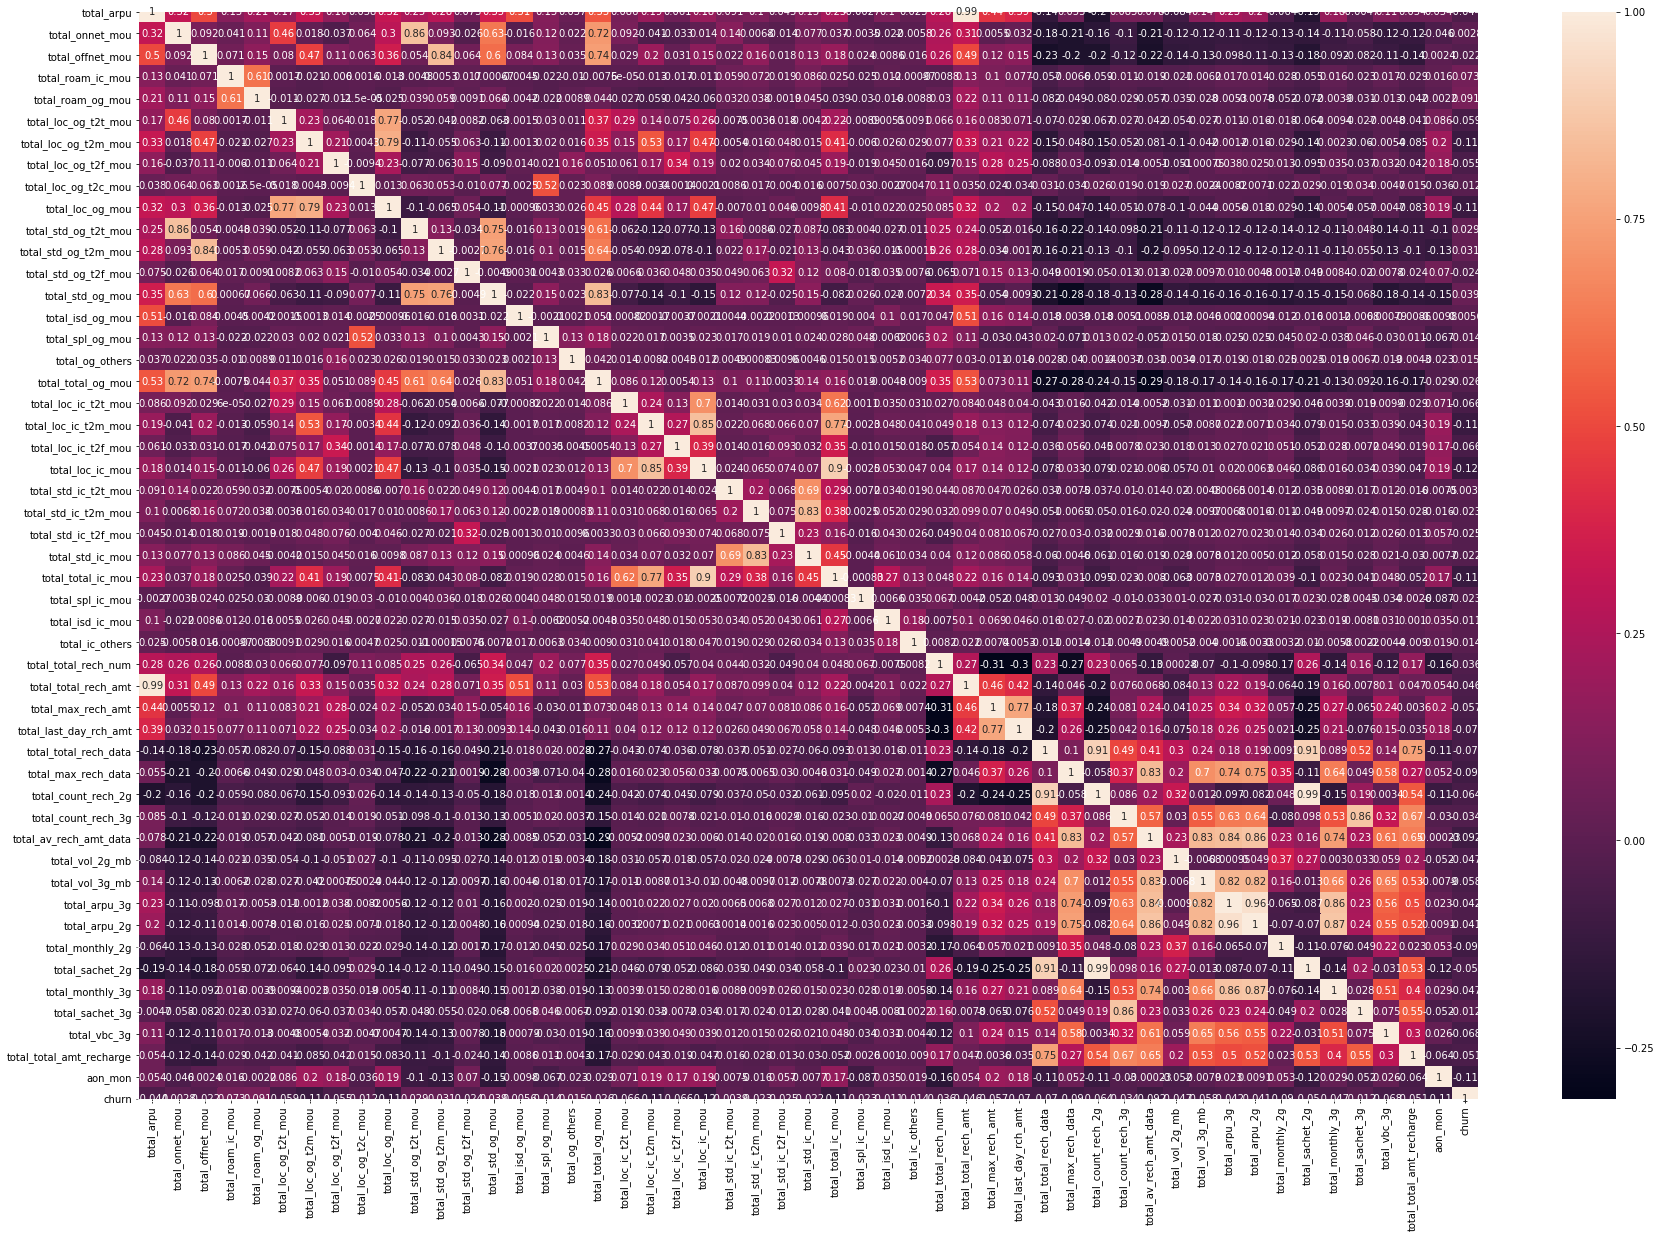

In [75]:
#Lets plot the correlation matrix of new dataframe

#%matplotlib inline
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(total_data.corr(),annot = True)

This is the correlation of summation dataframe so it represents the same correlation characteristics of our original dataframe features<br>
total_arpu and total_rech_amt are highly correlated. The arpu is highly dependendent on the total amount recharged by the customers for calls than data<br>
Onnet_mou is highly depended on std_og_t2t (same network) and offnet_mou is dependednt on std_og_t2m(Other network)
total loc_og_mou is dependent on loc_og_t2t and loc_og_t2m<br>
Also total og_mou and onnet mou is highly dependent on std_og_mou<br>
Total loc_mou is highly dependent on loc_t2t_mou and total_std_mou is dependent on std_t2m_mou. So customers are getting local incoming calls mostly from the same network but getting std incoming calls from other networks<br>
Total_rech_amt is correlated with last_day_rech_amt. So mostly customers are recharging only once arpu_2g and arpu_3g are highly correlated. 2g_rech_amt is correlated with 2g_sachets and 3g_rech_mt is correlated with monthly. <br>
So customers are preferring to do 3g recharges monthly data packs while 2g they are preferring to do it in sachets. <br>
Mostly data columns are highly correlated with each other.

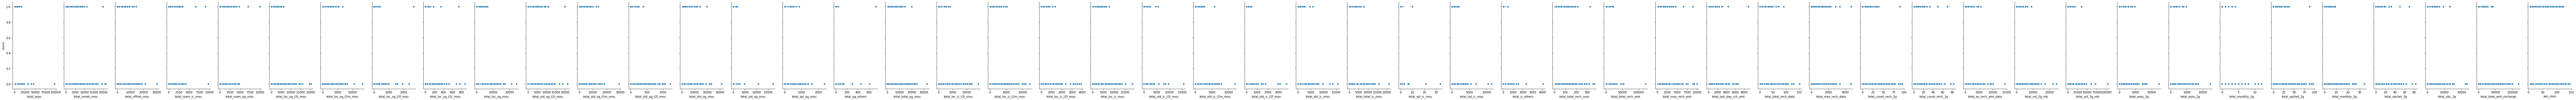

In [76]:
#Pair plot of all the columns with respect to churn
sns.pairplot(total_data, x_vars=total_data.drop('churn', axis=1).columns, y_vars='churn', size=5, aspect=0.5,kind='scatter')

There are outliers present in some of the columns, lets observe them and remove the outliers

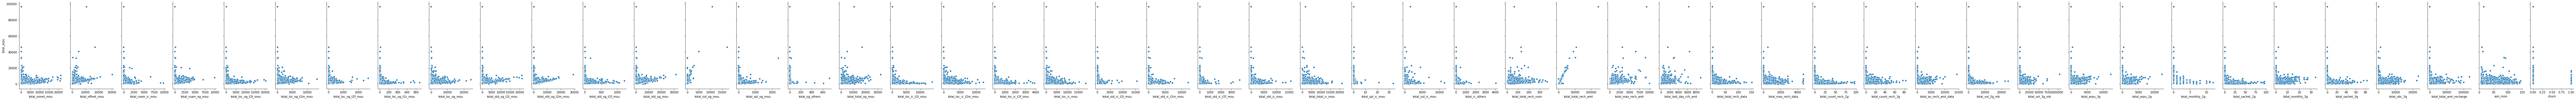

In [77]:
sns.pairplot(total_data, x_vars=total_data.drop('total_arpu', axis=1).columns, y_vars='total_arpu', size=5, aspect=0.5,kind='scatter')

In [78]:
#Outliers in total_arpu
total_data[total_data['total_arpu']>40000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
38610    96420.55            17.84          10725.83               0.00   
51314    46152.28             0.18          17232.18               1.00   
67717    40614.78            37.53           4913.58               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
38610               0.00                 17.84                 11.20   
51314             139.98                  0.18                  0.00   
67717               0.00                 37.53                 43.21   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
38610                  0.00                  0.00             29.06   
51314                  0.60                  9.68              0.78   
67717                  3.35                  0.15             84.11   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
38610                  0.00                  0.18                  0.00   
51314                  0.00                  2.05                  0.00   
67717                  0.00                 11.02                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
38610              0.18          10727.21              0.00             0.00   
51314              2.05          17072.48             19.74             0.00   
67717             11.02           4869.62              0.15             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
38610            10756.48                 35.42                 18.15   
51314            17095.07                  0.59                  0.05   
67717             4964.93                 42.78                 28.20   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
38610                  1.43             55.01                  2.28   
51314                  0.35              0.99                  3.98   
67717                  0.00             71.00                  1.54   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
38610                  5.06                  0.00              7.34   
51314                  0.00                  1.78              5.76   
67717                 35.16                  0.00             36.71   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
38610             1672.78              0.19           1597.74   
51314               10.65              0.41              2.75   
67717              578.33              0.00            470.58   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
38610            12.43                    65                120845   
51314             0.71                   126                 53479   
67717             0.00                   131                 45380   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
38610                9300                    6235                   0.00   
51314                3169                    1500                   2.00   
67717                6550                    6450                   0.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
38610                 0.00                 0.00                 0.00   
51314               504.00                 0.00                 2.00   
67717                 0.00                 0.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
38610                    0.00             0.00             0.00   
51314                  504.00            26.42           833.73   
67717                    0.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
38610           0.00           0.00                 0                0   
51314         424.34         424.34                 0                0   
67717           0.00

In [79]:
#Outliers in total_offnet_mou
total_data[total_data['total_offnet_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035               0.00                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035               2255.20              29126.03                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18            707.70             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                  0.00            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035             0.00                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                   1.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                14.00                 1.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                   14.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035           0.00           0.00                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
33035                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
33035                     14.00    14.10      0

In [80]:
#Outliers in total_roam_ic
total_data[total_data['total_roam_ic_mou']>9500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
28436     1238.59           366.65            887.01            9716.20   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
28436            1099.49                 83.73                 61.58   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
28436                  0.00                  0.58            145.33   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
28436                  3.10                  2.44                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
28436              5.54              0.00              3.28             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
28436              154.17                119.85                 23.09   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
28436                 17.03            159.98                  0.00   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
28436                  4.70                  0.00              4.70   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
28436              164.68              0.00              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
28436             0.00                    23                  1411   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
28436                 365                     365                   4.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
28436               435.00                 0.00                 4.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
28436                  580.00            30.48          1217.47   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
28436         497.88         488.28                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
28436                 4                0        362.96   

       total_total_amt_recharge  aon_mon  churn  
28436                    870.00    12.77      0

In [81]:
#Outliers in total_roam_og_mou
total_data[total_data['total_roam_og_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
74987     8101.60          8394.67           1502.15              27.66   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
74987            9896.82                  0.00                  0.00   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
74987                  0.00                  0.00              0.00   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
74987                  0.00                  0.00                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
74987              0.00              0.00              0.00             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
74987                0.00                  0.00                  0.00   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
74987                  0.00              0.00                  0.00   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
74987                  0.00                  0.00              0.00   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
74987                0.00              0.00              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
74987             0.00                    23                 11354   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
74987                8966                    8966                   0.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
74987                 0.00                 0.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
74987                    0.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
74987           0.00           0.00                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
74987                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
74987                      0.00    10.00      1

In [82]:
#Outliers in total_loc_og_t2f_mou
total_data[total_data['total_loc_og_t2f_mou']>2000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
67497     4478.44            29.61           2675.15               0.00   
95046     7318.82           395.73           5203.92              92.46   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
67497               0.00                 29.61                312.41   
95046            1625.70                 40.10                  4.85   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
67497               2357.03                  5.68           2699.10   
95046               2673.84                  0.00           2718.81   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
67497                  0.00                  0.00                  0.00   
95046                116.70                 10.44                380.41   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
67497              0.00              0.00              8.54             0.00   
95046            507.58             63.27            684.26           720.96   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
67497             2707.65                 86.76                725.88   
95046             4694.95                 16.99                  1.89   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
67497               3296.79           4109.48                  1.24   
95046                  0.00             18.88                 88.92   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
67497                  0.53                  0.00              1.78   
95046                 32.24                112.75            233.93   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
67497             4111.61              0.33              0.01   
95046              339.78              0.00             86.94   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
67497             0.00                    86                  5313   
95046             0.00                    14                  6500   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
67497                 948                     213                   0.00   
95046                3000                    1500                   0.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
67497                 0.00                 0.00                 0.00   
95046                 0.00                 0.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
67497                    0.00             0.00             0.00   
95046                    0.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
67497           0.00           0.00                 0                0   
95046           0.00           0.00                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
67497                 0                0          0.00   
95046                 0                0        151.52   

       total_total_amt_recharge  aon_mon  churn  
67497                      0.00    27.93      0  
95046                      0.00     8.73      1

In [83]:
#Outliers in total_std_og_t2m_mou
total_data[total_data['total_std_og_t2m_mou']>20000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035               0.00                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035               2255.20              29126.03                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18            707.70             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                  0.00            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035             0.00                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                   1.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                14.00                 1.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                   14.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035           0.00           0.00                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
33035                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
33035                     14.00    14.10      0

In [84]:
#Outliers in total_std_og_mou
total_data[total_data['total_std_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035               0.00                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035               2255.20              29126.03                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18            707.70             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                  0.00            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035             0.00                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                   1.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                14.00                 1.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                   14.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035           0.00           0.00                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
33035                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
33035                     14.00    14.10      0

In [85]:
#Outliers in total_isd_og_mou
total_data[total_data['total_isd_og_mou']>15000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
51314    46152.28             0.18          17232.18               1.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
51314             139.98                  0.18                  0.00   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
51314                  0.60                  9.68              0.78   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
51314                  0.00                  2.05                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
51314              2.05          17072.48             19.74             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
51314            17095.07                  0.59                  0.05   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
51314                  0.35              0.99                  3.98   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
51314                  0.00                  1.78              5.76   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
51314               10.65              0.41              2.75   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
51314             0.71                   126                 53479   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
51314                3169                    1500                   2.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
51314               504.00                 0.00                 2.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
51314                  504.00            26.42           833.73   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
51314         424.34         424.34                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
51314                 2                0       1094.61   

       total_total_amt_recharge  aon_mon  churn  
51314                    504.00     9.63      0

In [86]:
#Outliers in total_og_others
total_data[total_data['total_og_others']>600]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
83646      967.59           140.81            680.93              74.94   
95046     7318.82           395.73           5203.92              92.46   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
83646              63.74                 16.06                234.75   
95046            1625.70                 40.10                  4.85   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
83646                 69.21                  0.00            320.07   
95046               2673.84                  0.00           2718.81   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
83646                 97.50                124.99                  1.01   
95046                116.70                 10.44                380.41   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
83646            223.53              0.43            213.95           609.81   
95046            507.58             63.27            684.26           720.96   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
83646             1367.83                120.58                323.36   
95046             4694.95                 16.99                  1.89   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
83646                 73.91            517.90                233.00   
95046                  0.00             18.88                 88.92   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
83646                 60.86                100.89            394.78   
95046                 32.24                112.75            233.93   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
83646             1247.26              0.00            334.55   
95046              339.78              0.00             86.94   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
83646             0.00                    21                  1001   
95046             0.00                    14                  6500   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
83646                 370                     150                   6.00   
95046                3000                    1500                   0.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
83646                46.00                 5.00                 1.00   
95046                 0.00                 0.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
83646                   95.00           103.61           128.77   
95046                    0.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
83646          40.61          35.00                 0                5   
95046           0.00           0.00                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
83646                 0                1        204.77   
95046                 0                0        151.52   

       total_total_amt_recharge  aon_mon  churn  
83646                    455.00    10.53      0  
95046                      0.00     8.73      1

In [87]:
#Outliers in total_total_og_mou
total_data[total_data['total_total_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035               0.00                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
33035                  4.93                 23.53            453.48   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
33035               2255.20              29126.03                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
33035          31381.25              0.18            707.70             0.03   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
33035            32542.68                 34.93                157.47   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
33035                 38.28            230.71                 15.26   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
33035                107.46                  0.00            122.75   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
33035              353.91              0.43              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
33035             0.00                   111                 14077   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
33035                 646                     441                   1.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
33035                14.00                 1.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
33035                   14.00             0.00             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
33035           0.00           0.00                 0                1   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
33035                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
33035                     14.00    14.10      0

In [88]:
#Outliers in total_loc_ic_t2t_mou
total_data[total_data['total_loc_ic_t2t_mou']>12000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
34952     2785.08          1438.76           1142.54               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
34952               0.00               1201.29                536.78   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
34952                 36.30                 35.29           1774.40   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
34952                237.02                441.22                 10.02   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
34952            688.28              0.00            129.35             2.14   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
34952             2594.21              14126.61                813.20   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
34952                353.55          15293.40                317.55   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
34952                345.94                 24.33            687.87   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
34952            16000.67              0.00             13.99   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
34952             5.40                    44                  3113   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
34952                 395                     395                   1.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
34952               175.00                 1.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
34952                  175.00            57.18             1.66   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
34952           0.00           7.40                 1                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
34952                 0                0          1.89   

       total_total_amt_recharge  aon_mon  churn  
34952                    175.00    20.17      0

In [89]:
#Outliers in total_std_ic_t2m_mou
total_data[total_data['total_std_ic_t2m_mou']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
12898     2019.80           421.58           3518.78              24.13   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
12898              16.85                 24.83                233.33   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
12898                  0.00                 39.01            258.18   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
12898                396.74               3215.29                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
12898           3612.05              0.00             71.63             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
12898             3941.90                 31.30                182.78   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
12898                  0.00            214.09                563.71   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
12898              11891.03                 27.05          12481.83   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
12898            12695.95              0.00              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
12898             0.00                    38                  2383   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
12898                 450                     111                   2.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
12898                14.00                 2.00                 0.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
12898                   28.00            57.92             0.00   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
12898           0.00           5.15                 0                2   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
12898                 0                0          0.00   

       total_total_amt_recharge  aon_mon  churn  
12898                     56.00     7.37      0

In [90]:
#Outliers in total_isd_ic_mou
total_data[total_data['total_isd_ic_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
71514     1758.51           278.68            612.53               0.00   
83599     3386.16           111.60            578.20               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
71514               0.00                222.19                210.52   
83599               0.00                111.27                392.88   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
71514                 21.66                  0.00            454.41   
83599                138.38                 13.34            642.56   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
71514                 56.47                 38.69                  0.00   
83599                  0.00                  0.78                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
71514             95.17            341.62              0.00             0.00   
83599              0.78             43.57             13.34             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
71514              891.23                258.96                 78.52   
83599              700.29                 91.67                385.11   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
71514                 12.52            350.04                140.27   
83599                 29.85            506.66                  0.56   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
71514                 75.28                  6.73            222.30   
83599                 27.51                 29.35             57.42   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
71514            12360.53              0.00          11418.48   
83599            11009.48              0.33          10375.71   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
71514           369.66                    17                  2292   
83599            69.28                    20                  3918   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
71514                 685                     458                   4.00   
83599                1662                     500                   6.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
71514               648.00                 3.00                 1.00   
83599              1662.00                 0.00                 6.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
71514                  846.00           511.25          2228.54   
83599                 2418.00            30.70         12787.07   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
71514         454.00         258.27                 3                0   
83599        2218.95        2052.50                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
71514                 1                0       2324.84   
83599                 6                0       5523.35   

       total_total_amt_recharge  aon_mon  churn  
71514                   1296.00    26.53      0  
83599                   4837.00    79.07      0

In [91]:
#Outliers in total_arpu_2g
total_data[total_data['total_arpu_2g']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
27531    12204.97             0.00             11.92               0.00   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
27531               0.00                  0.00                  0.53   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  \
27531                  0.00                 10.24              0.53   

       total_std_og_t2t_mou  total_std_og_t2m_mou  total_std_og_t2f_mou  \
27531                  0.00                  0.00                  0.00   

       total_std_og_mou  total_isd_og_mou  total_spl_og_mou  total_og_others  \
27531              0.00              0.00             11.39             0.00   

       total_total_og_mou  total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  \
27531               11.92                  0.00                  0.00   

       total_loc_ic_t2f_mou  total_loc_ic_mou  total_std_ic_t2t_mou  \
27531                  0.00              0.00                  0.00   

       total_std_ic_t2m_mou  total_std_ic_t2f_mou  total_std_ic_mou  \
27531                  0.00                  0.00              0.00   

       total_total_ic_mou  total_spl_ic_mou  total_isd_ic_mou  \
27531                0.03              0.03              0.00   

       total_ic_others  total_total_rech_num  total_total_rech_amt  \
27531             0.00                    15                 14376   

       total_max_rech_amt  total_last_day_rch_amt  total_total_rech_data  \
27531                4665                    4665                  10.00   

       total_max_rech_data  total_count_rech_2g  total_count_rech_3g  \
27531              4665.00                 0.00                10.00   

       total_av_rech_amt_data  total_vol_2g_mb  total_vol_3g_mb  \
27531                14346.00             0.27        103371.75   

       total_arpu_3g  total_arpu_2g  total_monthly_2g  total_sachet_2g  \
27531       12248.30       12248.25                 0                0   

       total_monthly_3g  total_sachet_3g  total_vbc_3g  \
27531                10                0       6445.67   

       total_total_amt_recharge  aon_mon  churn  
27531                  48958.00     7.40      0

In [92]:
churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_arpu']>40000].index)
total_data = total_data.drop(total_data[total_data['total_arpu']>40000].index)


churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_offnet_mou']>30000].index)
total_data = total_data.drop(total_data[total_data['total_offnet_mou']>30000].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_roam_ic_mou']>9500].index)
total_data = total_data.drop(total_data[total_data['total_roam_ic_mou']>9500].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_roam_og_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_roam_og_mou']>7500].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)
total_data = total_data.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)
total_data = total_data.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)
total_data = total_data.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_isd_ic_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_isd_ic_mou']>7500].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_arpu_2g']>10000].index)
total_data = total_data.drop(total_data[total_data['total_arpu_2g']>10000].index)

churn_high_val_cust = churn_high_val_cust.drop(total_data[total_data['total_total_rech_amt']==0].index)
total_data = total_data.drop(total_data[total_data['total_total_rech_amt']==0].index)

In [93]:
#Get the info of the high_value_cust dataframe after dropping outliers
churn_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Columns: 170 entries, last_date_of_month_6 to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(124), int64(25)
memory usage: 36.7 MB


In [94]:
#Get the info of the total_data dataframe after dropping outliers
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Data columns (total 51 columns):
total_arpu                  29987 non-null float64
total_onnet_mou             29987 non-null float64
total_offnet_mou            29987 non-null float64
total_roam_ic_mou           29987 non-null float64
total_roam_og_mou           29987 non-null float64
total_loc_og_t2t_mou        29987 non-null float64
total_loc_og_t2m_mou        29987 non-null float64
total_loc_og_t2f_mou        29987 non-null float64
total_loc_og_t2c_mou        29987 non-null float64
total_loc_og_mou            29987 non-null float64
total_std_og_t2t_mou        29987 non-null float64
total_std_og_t2m_mou        29987 non-null float64
total_std_og_t2f_mou        29987 non-null float64
total_std_og_mou            29987 non-null float64
total_isd_og_mou            29987 non-null float64
total_spl_og_mou            29987 non-null float64
total_og_others             29987 non-null float64
total_total_og_mou      

Lets create another derived features where we indicate 1 if average first two months value(good months) is greater than last month(action month)

In [95]:
#Create new dataframe
goodvsaction_df = pd.DataFrame()

In [96]:
#For all the columns input one if average of good months is greater than action month value else 0
for col in collist:
    goodvsaction_df['good_action_'+col] = churn_high_val_cust[[col+'_6',col+'_7',col+'_8']].apply(lambda x: 1 if (((x[col+'_6']+x[col+'_7'])/2) >= (x[col+'_8'])) else -1, axis=1)

In [97]:
#Convert the features to category
goodvsaction_df = goodvsaction_df.apply(lambda x: x.astype('category'))

In [98]:
#Get first few rows of new dataframe
goodvsaction_df.head()

good_action_arpu good_action_onnet_mou good_action_offnet_mou  \
0                -1                     1                      1   
7                -1                     1                      1   
8                 1                     1                     -1   
21               -1                     1                     -1   
23               -1                     1                     -1   

   good_action_roam_ic_mou good_action_roam_og_mou good_action_loc_og_t2t_mou  \
0                        1                       1                          1   
7                       -1                      -1                          1   
8                        1                       1                          1   
21                       1                       1                         -1   
23                       1                       1                          1   

   good_action_loc_og_t2m_mou good_action_loc_og_t2f_mou  \
0                           1                          1   
7                           1                          1   
8                           1                          1   
21                         -1                         -1   
23                         -1                          1   

   good_action_loc_og_t2c_mou good_action_loc_og_mou  \
0                           1                      1   
7                           1                      1   
8                          -1                      1   
21                          1                     -1   
23                         -1                     -1   

   good_action_std_og_t2t_mou good_action_std_og_t2m_mou  \
0                           1                          1   
7                           1                         -1   
8                           1                         -1   
21                          1                         -1   
23                          1                         -1   

   good_action_std_og_t2f_mou good_action_std_og_mou good_action_isd_og_mou  \
0                           1                      1                      1   
7                          -1                     -1                     -1   
8                           1                      1                      1   
21                          1                     -1                      1   
23                          1                     -1                      1   

   good_action_spl_og_mou good_action_og_others good_action_total_og_mou  \
0                       1                     1                        1   
7                      -1                     1                        1   
8                      -1                     1                        1   
21                      1                     1                       -1   
23                     -1                     1                       -1   

   good_action_loc_ic_t2t_mou good_action_loc_ic_t2m_mou  \
0                          -1                         -1   
7                           1                          1   
8                           1                          1   
21                         -1                         -1   
23                         -1                         -1   

   good_action_loc_ic_t2f_mou good_action_loc_ic_mou  \
0                          -1                     -1   
7                           1                      1   
8                           1                      1   
21                         -1                     -1   
23                         -1                     -1   

   good_action_std_ic_t2t_mou good_action_std_ic_t2m_mou  \
0                           1                          1   
7                          -1                         -1   
8                           1                          1   
21                          1                         -1   
23                         -1                         -1   

   good_action_std_ic_t2f_mou good_action_std_ic_mou good

In [99]:
#Create new feature as difference of incoming and outgoing usages. Since we have 0 values we cannot use ratio
total_data['in_out_difference']=total_data['total_total_ic_mou']-total_data['total_total_og_mou']

In [100]:
#Create new feature as difference of onnet and offnet usages. Since we have 0 values we cannot use ratio
total_data['onnet_offnet_difference'] = total_data['total_onnet_mou']-total_data['total_offnet_mou']

In [101]:
#Get ratio of data arpu to amount arpu
total_data['arpu_data_to_total_ratio'] = (total_data['total_arpu_2g']+total_data['total_arpu_3g'])/total_data['total_arpu']

In [102]:
#Get the ratio of average data recharge to amount recharge
total_data['data_to_amt_ratio']=total_data['total_av_rech_amt_data']/total_data['total_total_rech_amt']

In [103]:
#Drop aon_mon and churn columns from total_data
total_data=total_data.drop(['aon_mon','churn'], axis=1)

In [104]:
#Get info of goodvsaction_df dataframe
goodvsaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29987 entries, 0 to 99997
Data columns (total 49 columns):
good_action_arpu                  29987 non-null category
good_action_onnet_mou             29987 non-null category
good_action_offnet_mou            29987 non-null category
good_action_roam_ic_mou           29987 non-null category
good_action_roam_og_mou           29987 non-null category
good_action_loc_og_t2t_mou        29987 non-null category
good_action_loc_og_t2m_mou        29987 non-null category
good_action_loc_og_t2f_mou        29987 non-null category
good_action_loc_og_t2c_mou        29987 non-null category
good_action_loc_og_mou            29987 non-null category
good_action_std_og_t2t_mou        29987 non-null category
good_action_std_og_t2m_mou        29987 non-null category
good_action_std_og_t2f_mou        29987 non-null category
good_action_std_og_mou            29987 non-null category
good_action_isd_og_mou            29987 non-null category
good_action_spl_og_mo

In [105]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)

In [106]:
final_data = pd.concat([churn_high_val_cust[churn_high_val_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)

In [107]:
#Get the info of master dataframe
final_data.columns.tolist()

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_roam_ic_mou',
 'total_roam_og_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_t2c_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_spl_og_mou',
 'total_og_others',
 'total_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_spl_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_max_rech_amt',
 'total_last_day_rch_amt',
 'total_total_rech_data

In [108]:
final_data[['aon_mon','churn']] = churn_high_val_cust[['aon_mon','churn']]

In [109]:
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)

In [110]:
#Check if any nulls exist in final dataframe
round(100*(final_data.isnull().sum()/len(final_data.index)), 2).sum()

0.0

In [111]:
#Get all string columns
str_cols = final_data.select_dtypes(include=['category']).columns.tolist()

In [112]:
# Add data to df data for transforming string variables
df = final_data

In [113]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)
final_data = pd.concat([churn_high_val_cust[churn_high_val_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)
final_data[['aon_mon','churn']] = churn_high_val_cust[['aon_mon','churn']]
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)
final_data.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
21               -1               -1               -1        -1        -1   
23               -1                1                1        -1         1   

   fb_user_8 rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7  \
0          1          1          1          1           1           1   
7         -1          1          1          1          -1          -1   
8          1          1          1          1          -1           1   
21        -1          1          1          1          -1          -1   
23         1          1          1          1          -1           1   

   rech_data_8  total_arpu  total_onnet_mou  total_offnet_mou  \
0            1      626.00             0.00              0.00   
7           -1     5590.51           164.81           1346.50   
8            1     1008.31           799.80            311.77   
21          -1     1749.97           319.66           2638.00   
23           1      635.21           133.20            380.66   

    total_roam_ic_mou  total_roam_og_mou  total_loc_og_t2t_mou  \
0                0.00               0.00                  0.00   
7               81.36              74.39                123.05   
8                0.00               0.00                527.21   
21               0.00               0.00                 33.98   
23               0.00               0.00                133.20   

    total_loc_og_t2m_mou  total_loc_og_t2f_mou  total_loc_og_t2c_mou  \
0                   0.00                  0.00                  0.00   
7                 918.29                170.50                  0.00   
8                 202.08                  0.00                  7.15   
21                284.55                  2.33                  0.00   
23                314.51                  0.00                 17.71   

    total_loc_og_mou  total_std_og_t2t_mou  total_std_og_t2m_mou  \
0               0.00                  0.00                  0.00   
7            1211.86                 39.60                130.79   
8             729.31                272.57                 99.42   
21            320.87                285.66               2351.09   
23            447.73                  0.00                 48.32   

    total_std_og_t2f_mou  total_std_og_mou  total_isd_og_mou  \
0                   0.00              0.00              0.00   
7                  43.42            213.84             10.19   
8                   0.00            372.02              0.00   
21                  0.00           2636.77              0.00   
23                  0.00             48.32              0.01   

    total_spl_og_mou  total_og_others  total_total_og_mou  \
0               0.00             0.00                0.00   
7              11.00             0.00             1446.93   
8              10.23             0.00             1111.58   
21              0.00             0.00             2957.67   
23             17.81             0.00              513.90   

    total_loc_ic_t2t_mou  total_loc_ic_t2m_mou  total_loc_ic_t2f_mou  \
0                   0.16                  4.13                  1.15   
7                 117.71                560.24                293.15   
8                  33.99                 87.04                  0.00   
21                 32.21                322.02                 17.84   
23                158.39                356.11                  0.71   

    total_loc_ic_mou  total_std_ic_t2t_mou  total_std_ic_t2m_mou  \
0               5.44                  0.00                  0.00   
7             971.15                 79.11                359.76   
8             121.05                  0.68                 27.16   
21            

The goal of EDA is to determine what our data can tell us!!! In this section, we make plots and find patterns, relationships etc.
We will start with our target variable i.e. 'churn_flag'

In [114]:
final_data['churn'].value_counts()

0    27548
1     2439
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

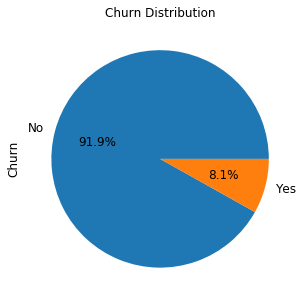

In [115]:
#Churn Distribution
ax = (final_data['churn'].value_counts()*100.0 /len(final_data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

The flags 0 & 1 are Non-churn and churn respectively. We can clearly see that the churn customers are 8.1% only. So, we can infer that the dataset is an imbalanced one.

What is an Imbalanced data?

Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

Text(0.5, 1.0, 'Churn status Distribution')

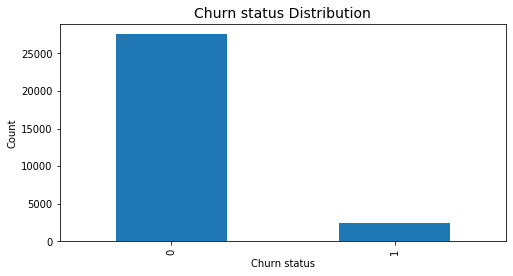

In [116]:
plt.figure(figsize=(8,4))
final_data['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

### mobile_number

In [117]:
churn['mobile_number'].value_counts().sort_values(ascending = False).head()

7000817664    1
7001370156    1
7001330291    1
7000225823    1
7000973324    1
Name: mobile_number, dtype: int64

We can infer that the mobile_number is not an unique column, means it's repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis.

### arpu (Average Revenue per user)

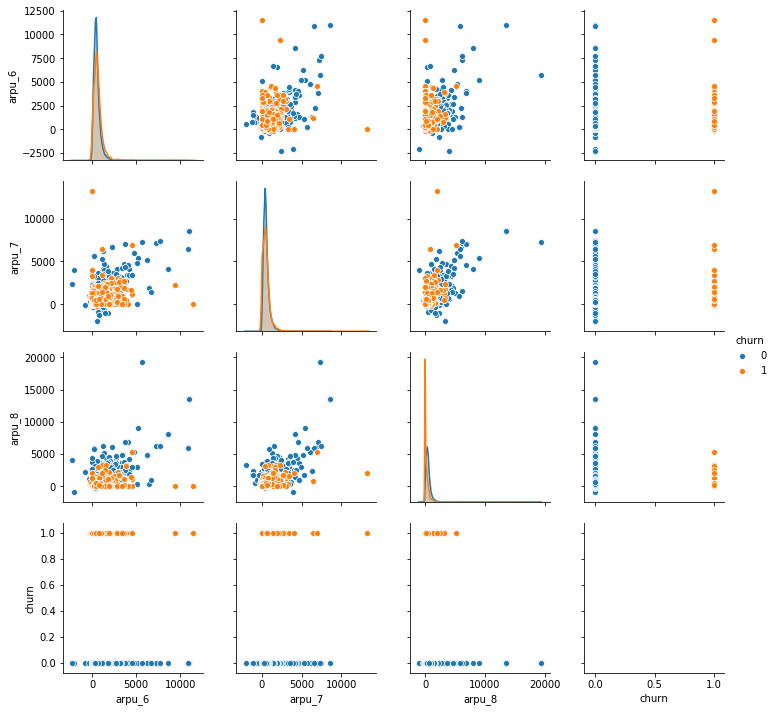

In [118]:
sns.pairplot(data=churn_high_val_cust[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

1. in the 6th month the churn is more.
2. in the 8th revenue is more.

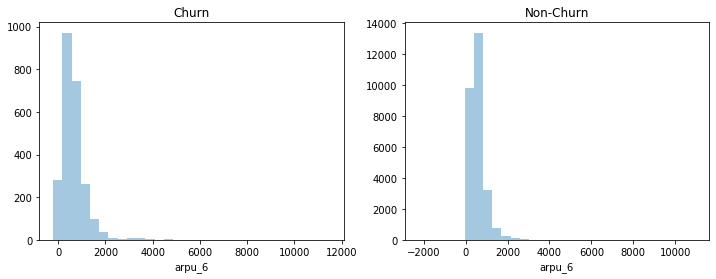

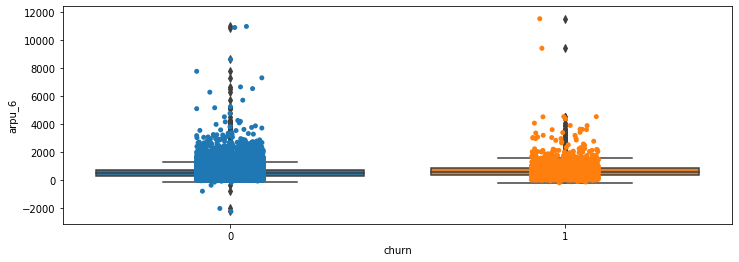

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='arpu_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

1. There is presence of outliers which needs to be treated.
2. churn is more in the 6th month.

### onnet_mou (On network/ within the same network usage)

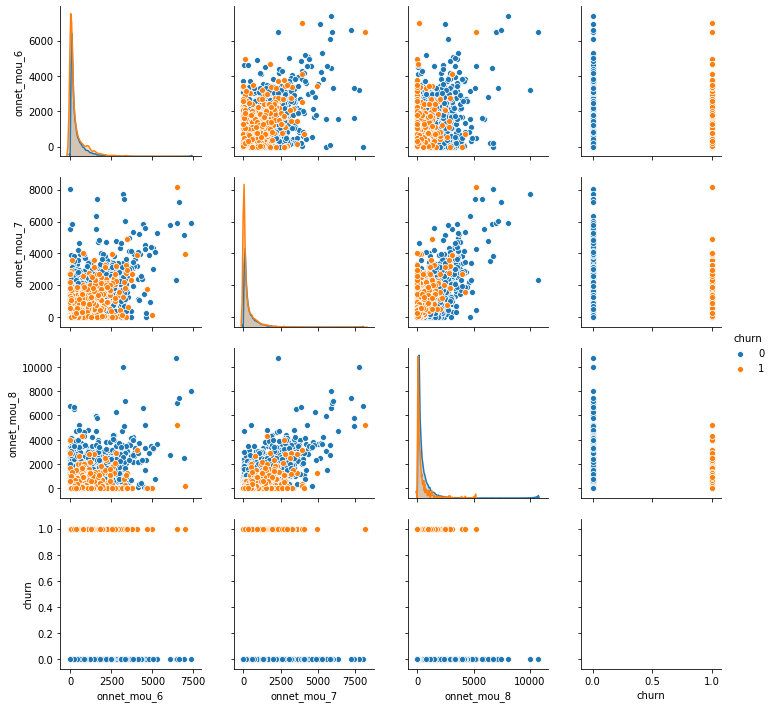

In [120]:
sns.pairplot(data=churn_high_val_cust[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

Churn customers dont remain in the same network.

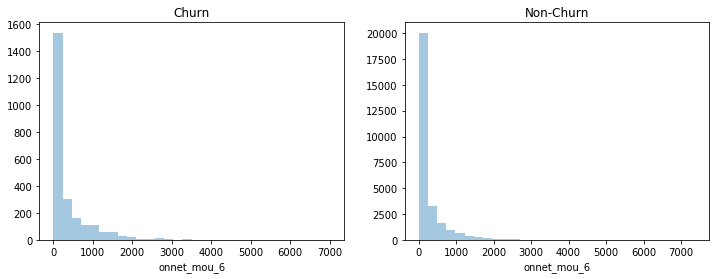

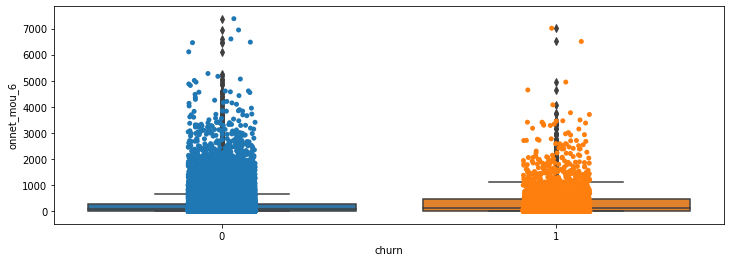

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='onnet_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='onnet_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn customers dont remain in the same network.

### roam_ic_mou (Customer in roaming zone)

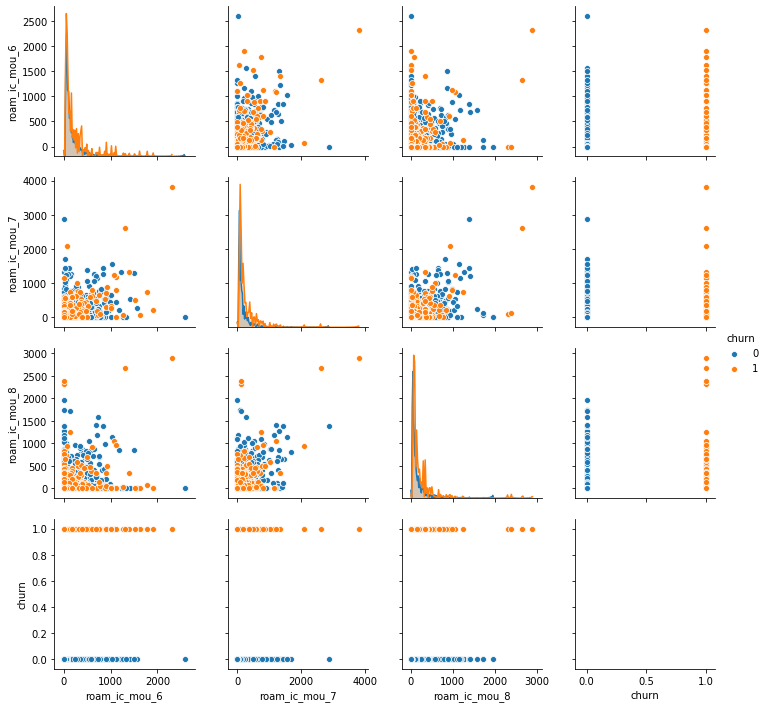

In [122]:
sns.pairplot(data=churn_high_val_cust[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

Churn customers roam a lot.

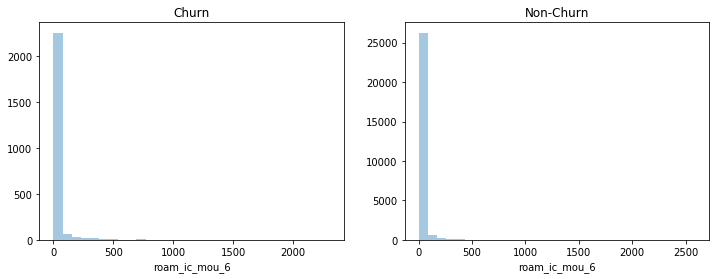

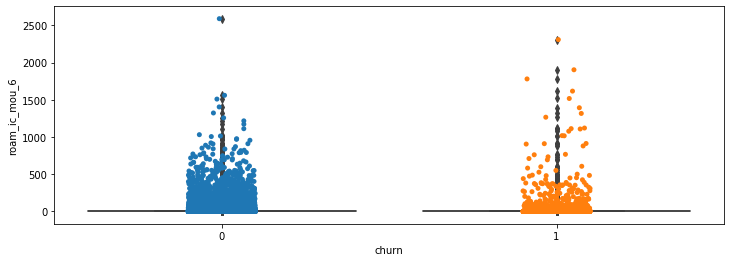

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='roam_ic_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='roam_ic_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn customers roam a lot.

### loc_og_mou (within the circle outgoing calls)

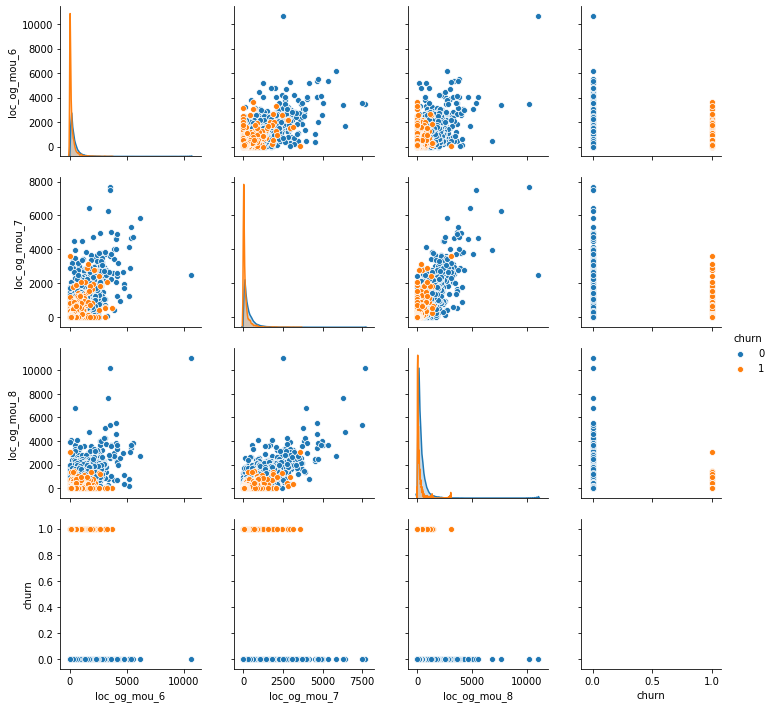

In [124]:
sns.pairplot(data=churn_high_val_cust[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

Churn customers make high outgoing calls.

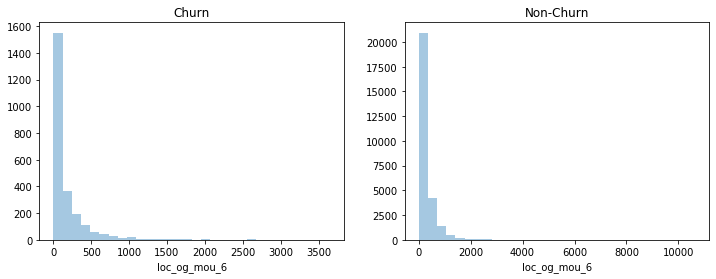

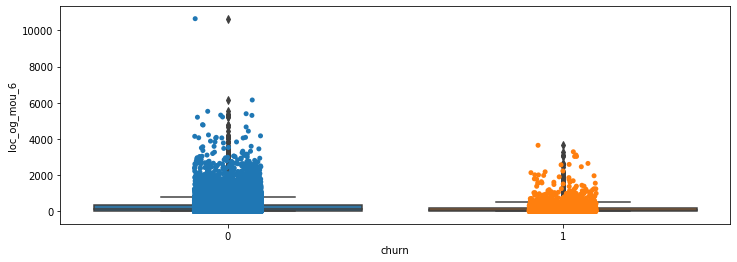

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_og_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='loc_og_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn customers make high outgoing calls.

### std_og_mou (Outside calling circle/zone calls)

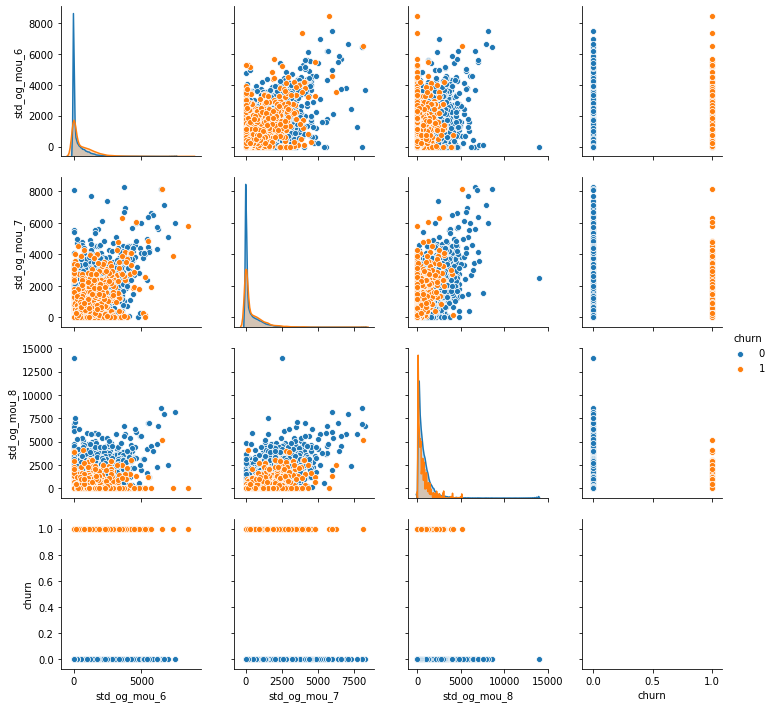

In [126]:
sns.pairplot(data=churn_high_val_cust[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

Churn customers make high outgoing calls.

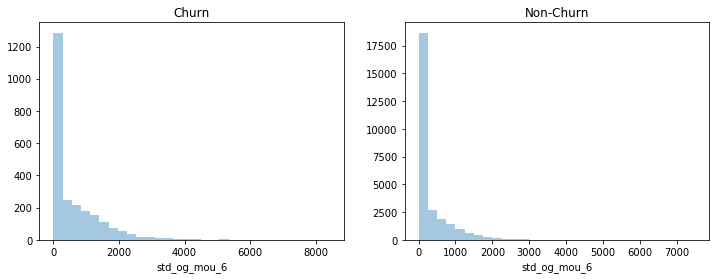

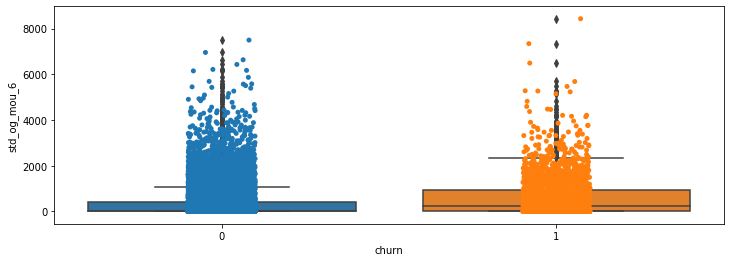

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_og_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='std_og_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn customers make high outgoing calls.

### isd_og (international calling)

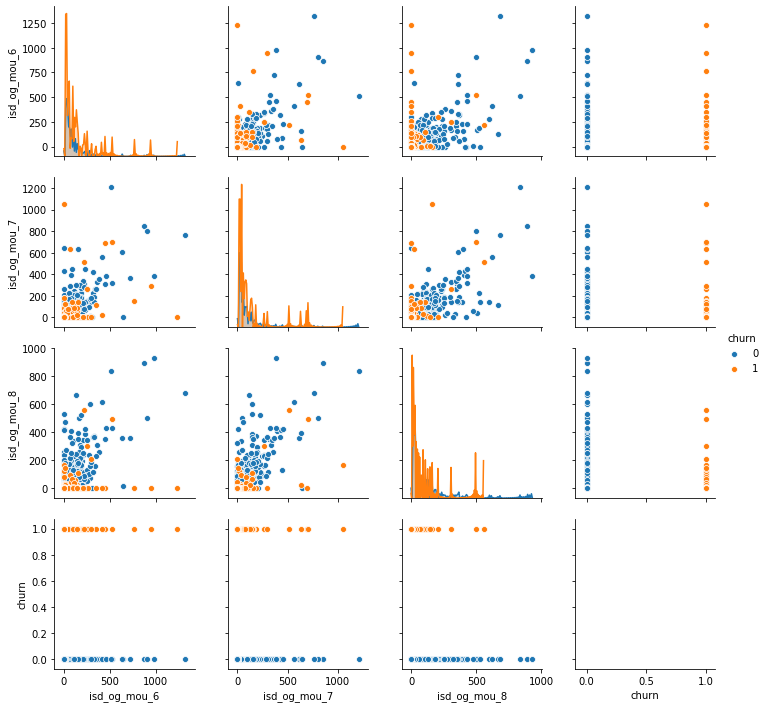

In [128]:
sns.pairplot(data=churn_high_val_cust[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

Churn customers make high incoming calls.

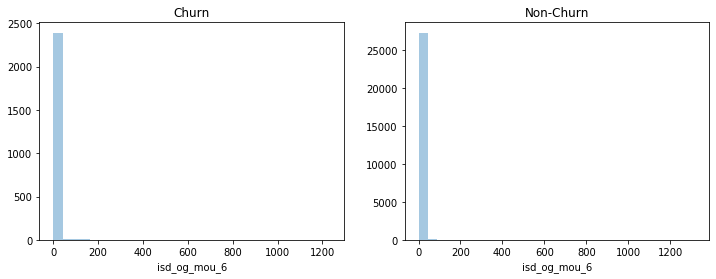

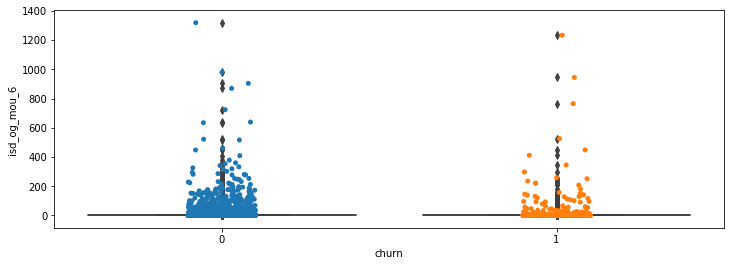

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='isd_og_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='isd_og_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn customers make high incoming calls.

### totalog (All outgoing calls by the customer)

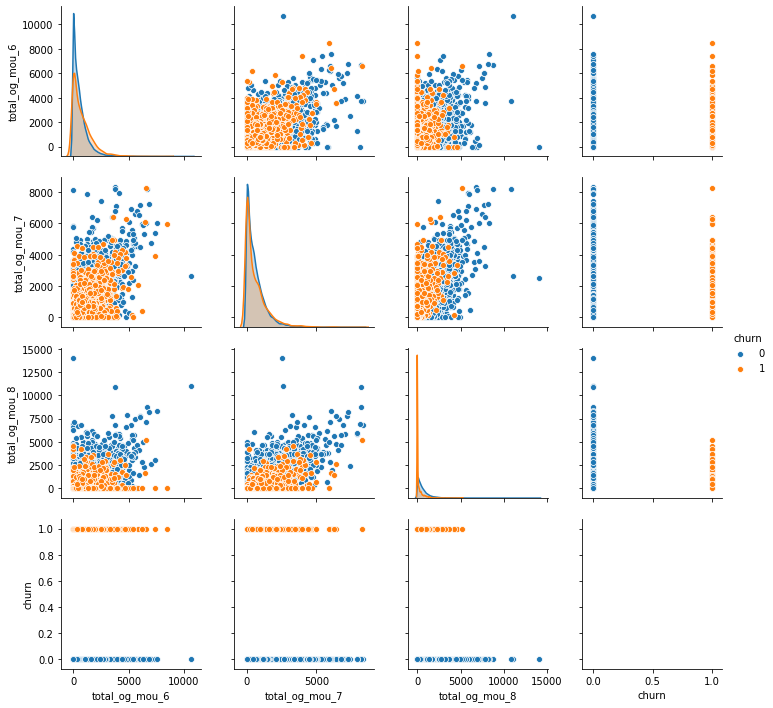

In [130]:
sns.pairplot(data=churn_high_val_cust[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

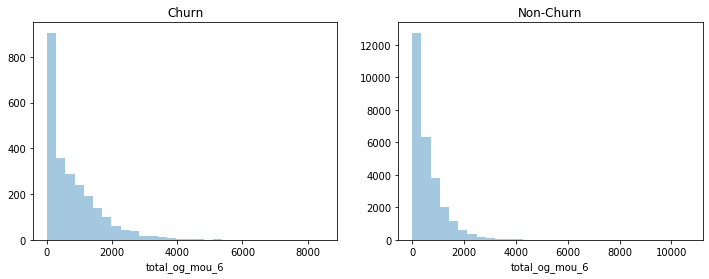

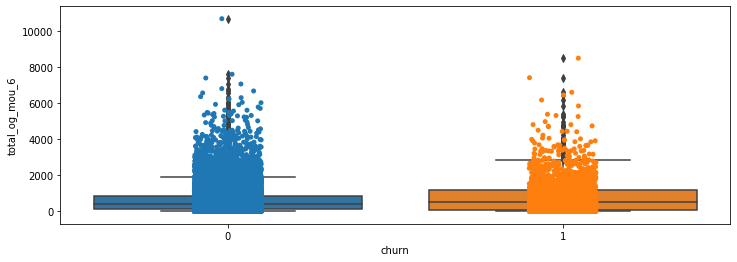

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_og_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='total_og_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

### locic (incoming local calls)

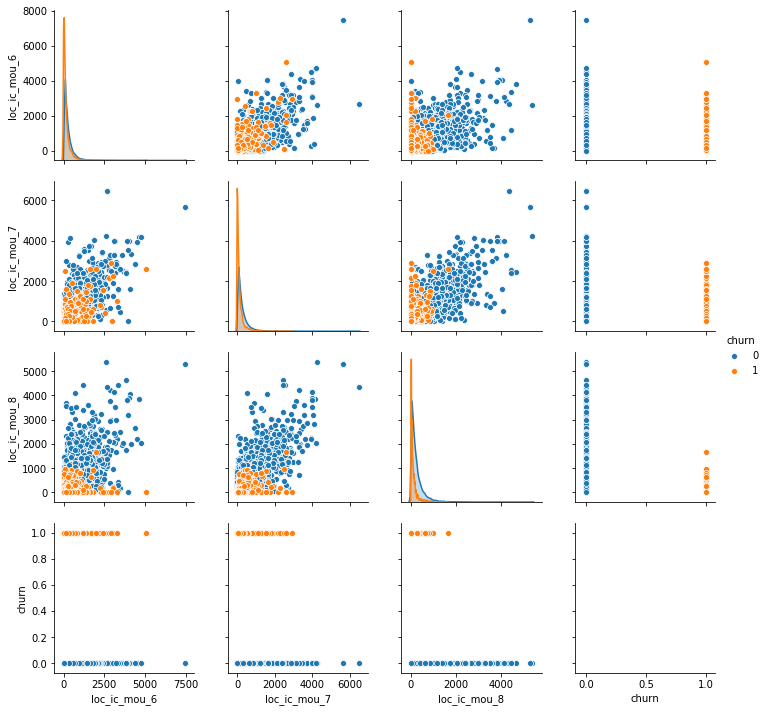

In [132]:
sns.pairplot(data=churn_high_val_cust[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

Non-Churn's have high incoming call compared to churn customers.

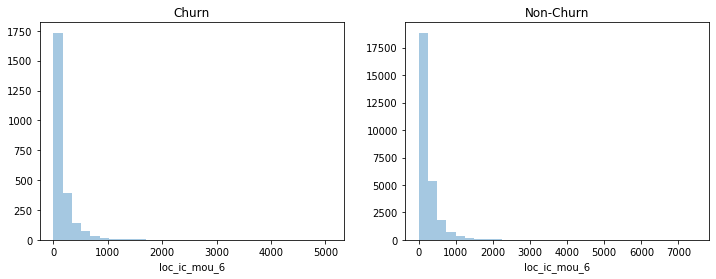

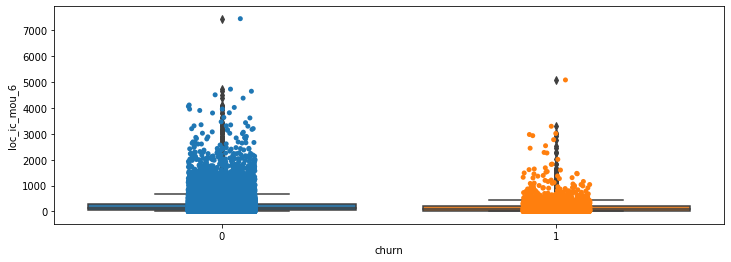

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_ic_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='loc_ic_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Non-Churn's have high incoming call compared to churn customers.

### stdic (Outside circle incoming calls)

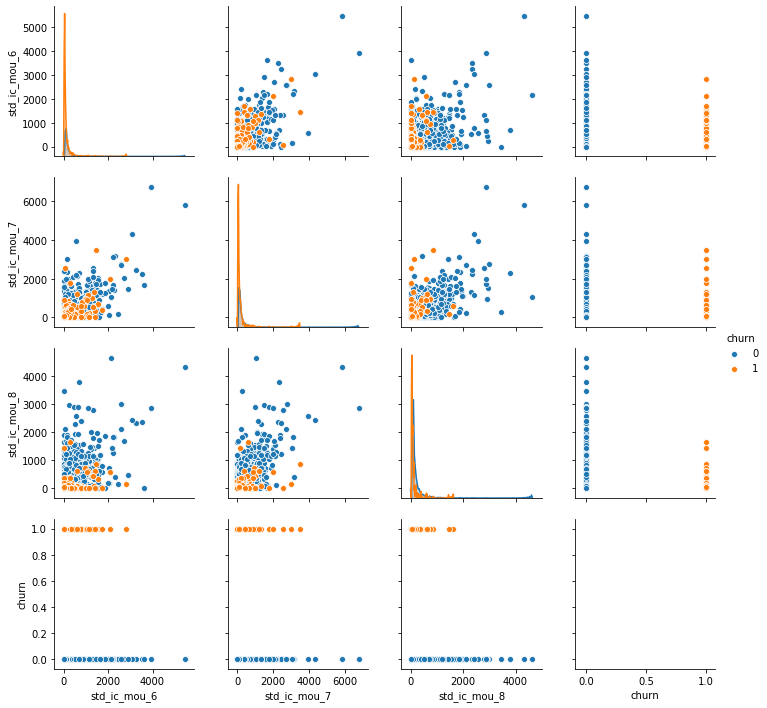

In [134]:
sns.pairplot(data=churn_high_val_cust[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

Churn have higher incoming STD calls compared to non-churn's.

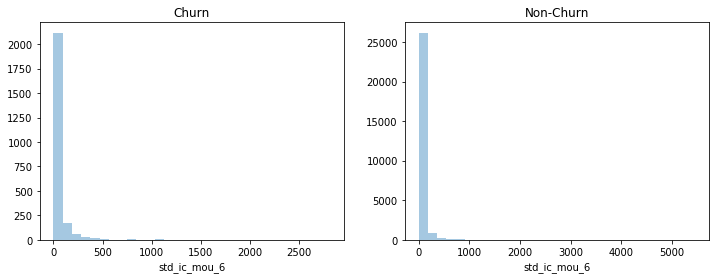

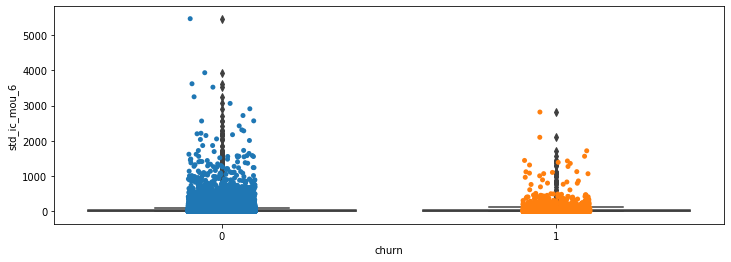

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_ic_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='std_ic_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn have higher incoming STD calls compared to non-churn's.

### totalic (All incoming calls received by a person)

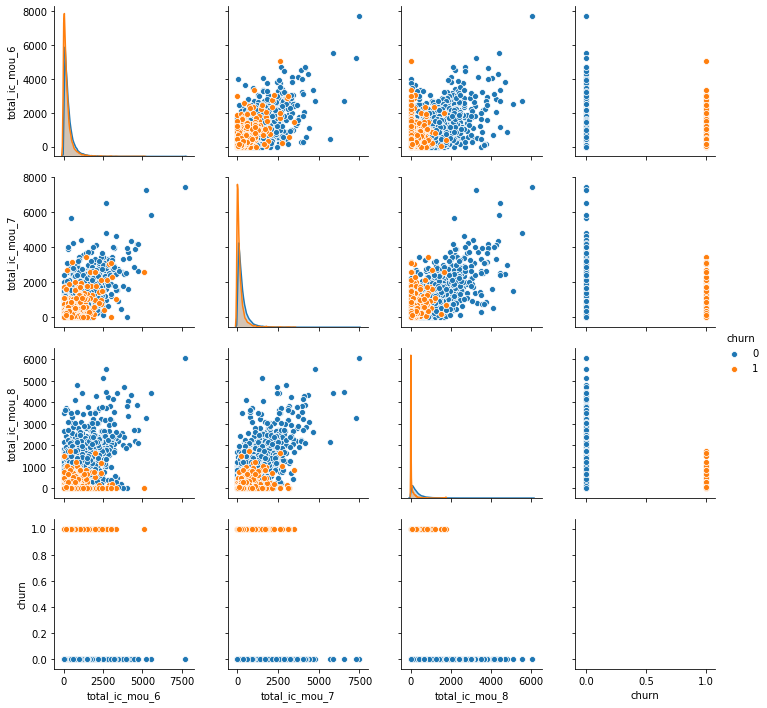

In [136]:
sns.pairplot(data=churn_high_val_cust[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

minutes of incoming call in the month of 6 n 7 are good compared to rest.

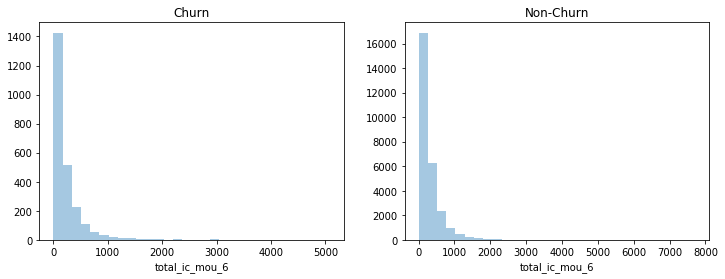

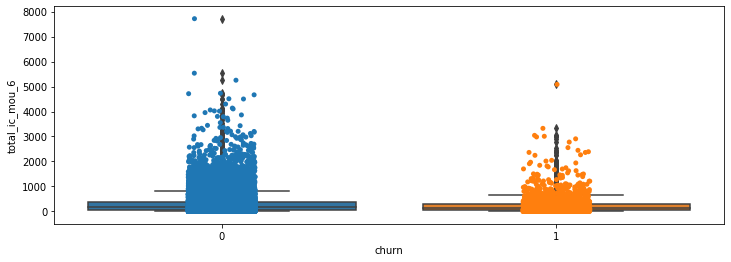

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(churn_high_val_cust[churn_high_val_cust['churn']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_ic_mou_6', data=churn_high_val_cust)
sns.stripplot(x='churn', y='total_ic_mou_6', data=churn_high_val_cust, jitter=True, edgecolor="gray")

Churn and non-churn are almost similar in the good month.

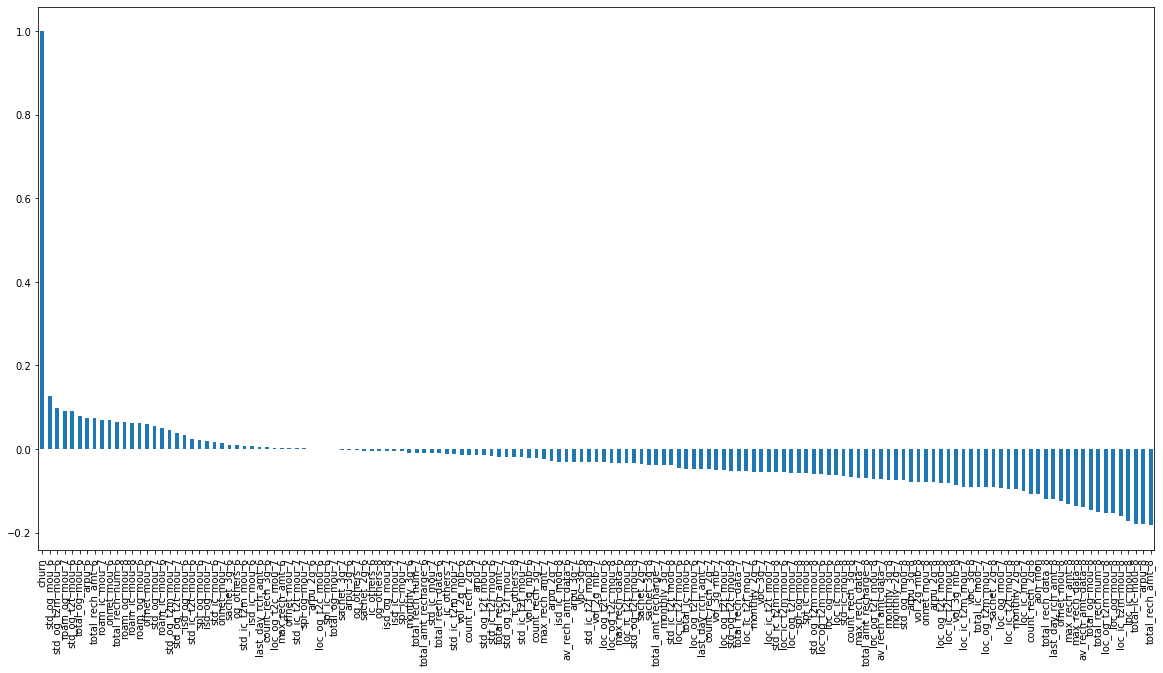

In [138]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
churn_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.

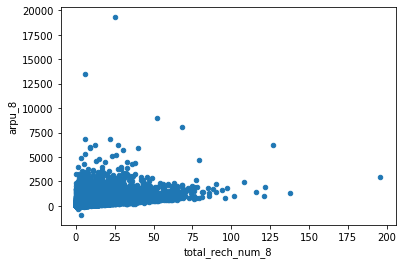

In [139]:
churn_high_val_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',  y='arpu_8')

1. Recharges are more only in initial months.
2. Revenue is also maximun initially.

Text(0.5, 1.0, 'Customers by their tenure')

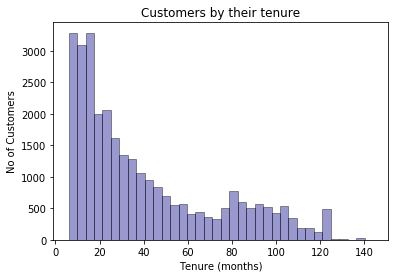

In [140]:
ax = sns.distplot(churn_high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

1. Customers are more for less tenure.
2. Chances these customers can churn is more.

In [141]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_high_val_cust['tenure_range'] = pd.cut(churn_high_val_cust['aon_mon'], tn_range, labels=tn_label)
churn_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

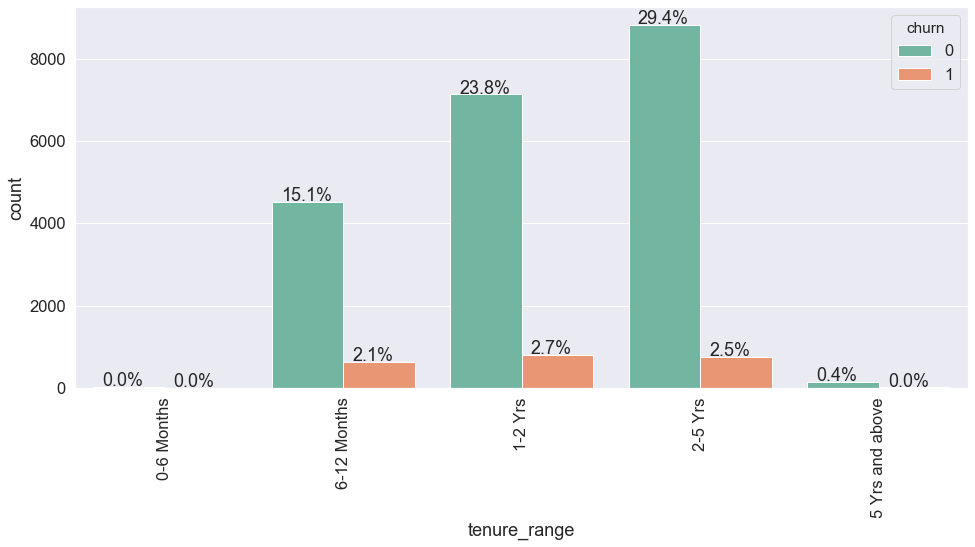

In [142]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(churn_high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(churn_high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=churn_high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(churn_high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

Higher the tenure lower is the risk of churn.

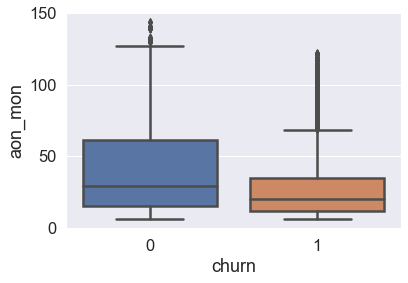

In [143]:
sns.boxplot(x = churn_high_val_cust.churn, y = churn_high_val_cust.aon_mon)

As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

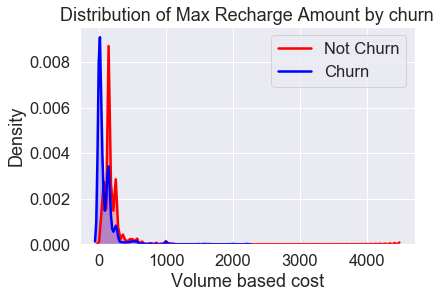

In [144]:
ax = sns.kdeplot(churn_high_val_cust.max_rech_amt_8[(churn_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(churn_high_val_cust.max_rech_amt_8[(churn_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

1. People Who Recharge with less Amount are more likely to Churn
2. There is no visible difference in Volume Based Cost & Churn

### Step 4 : Model Building

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

Advantages

1. Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
2. No loss of useful information

In [145]:
#Import scale package
#from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(df.drop(['churn'],axis=1))
#Get independent variable into new dataframe
y = df['churn']
#Get independent columns and update dataframe
X.columns=df.drop('churn',axis=1).columns

## Step 5 : Feature Scaling

Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X) 

In [147]:
#Import test_train_split to get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [148]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (20990, 115)
Training dataset target size (20990,)
Test dataset size (8997, 115)
Test dataset target size (8997,)


### Imbalance in Train and Test Dataset

In [149]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

Imbalance in Train Data :  0.08903185638684238
Imbalance in Test Data :  0.0873821609862219


### Balancing the data set with SMOTE

In [150]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [151]:
# After Balancing
print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr Shape (38548, 115)
y_tr Shape (38548,)
Imbalance in Train Data :  1.0


### Applying PCA

In [152]:
# Importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [153]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(38548, 115)
(8997, 115)


### Apply logistic regression with default PCA

In [154]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [155]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7082 1192]
 [ 138  585]]


In [156]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8521729465377348


In [157]:
col = list(X.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':col})
df_pca.head(10)

PC1   PC2           Feature
0 0.16 -0.16  night_pck_user_6
1 0.19 -0.11  night_pck_user_7
2 0.22  0.00  night_pck_user_8
3 0.16 -0.16         fb_user_6
4 0.19 -0.11         fb_user_7
5 0.22  0.00         fb_user_8
6 0.00 -0.00        rech_amt_6
7 0.08  0.13        rech_amt_7
8 0.13  0.22        rech_amt_8
9 0.16 -0.16       rech_data_6

In [158]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

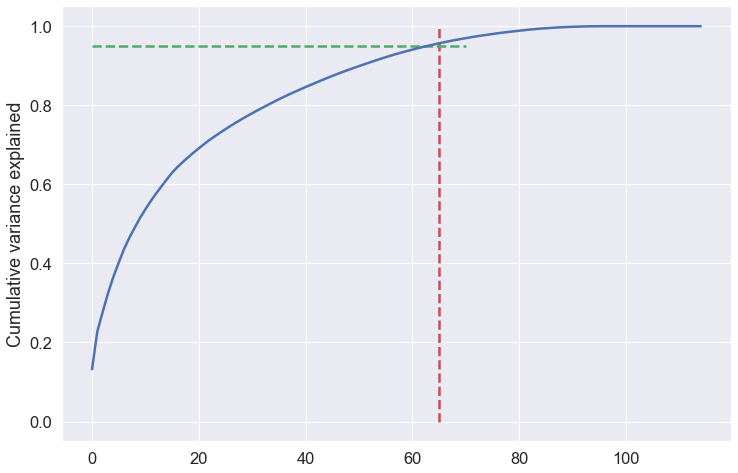

In [159]:
# Lets see the distibutions of columns in PCA in 2d space
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

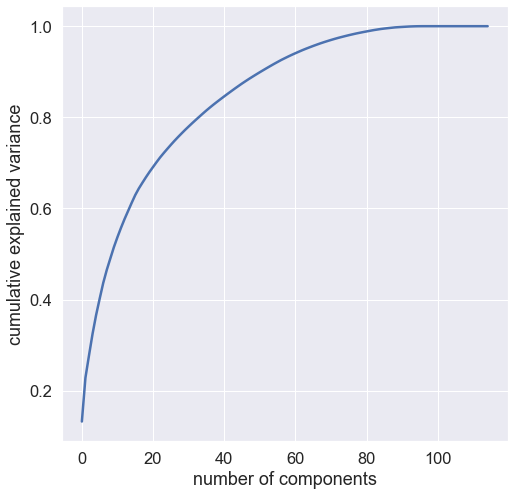

In [160]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the graph it is clear that around 30 components convey more than 95% of variance data.

In [161]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [13.2  9.6  4.9  4.7  4.1  3.6  3.5  2.9  2.5  2.5  2.2  2.1  1.9  1.8
  1.8  1.7  1.4  1.3  1.2  1.2  1.1  1.1  1.   0.9  0.9  0.9  0.9  0.8
  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. ]


In [162]:
print (pca.explained_variance_ratio_.cumsum())

[0.13224113 0.22822295 0.2771486  0.32459304 0.36600077 0.40182333
 0.43636319 0.46515326 0.49028228 0.51510962 0.53706177 0.55759361
 0.57683769 0.59465093 0.61239861 0.62943914 0.64376737 0.65629317
 0.66850277 0.68010273 0.69099866 0.70178686 0.71214944 0.72158353
 0.73067895 0.73960252 0.74826326 0.75652651 0.76451717 0.77234843
 0.77980681 0.78717685 0.79433669 0.80134195 0.80833664 0.81516655
 0.82169335 0.82803413 0.83413693 0.84011878 0.84601775 0.85183059
 0.85754254 0.86322993 0.86875047 0.87421392 0.87940566 0.88451625
 0.88942323 0.8942607  0.8990145  0.90367115 0.90827339 0.91280428
 0.91727233 0.92155734 0.92580392 0.92969506 0.93351222 0.93721009
 0.94074274 0.94415839 0.94753003 0.95069173 0.95371312 0.95668476
 0.95952221 0.9622925  0.96490539 0.96738903 0.96979079 0.97210769
 0.97431213 0.97634823 0.97833944 0.98026933 0.9820888  0.98386184
 0.98546115 0.98702702 0.98852222 0.98999521 0.99143972 0.99266009
 0.99386704 0.99485512 0.99573127 0.99656677 0.99737309 0.9978

From the above cumulative sum of Principal Components it is clear that around 66 components convey  ~95% of variance in data.

### Applying Logistic Regression with 66 components there by explaining ~95% of variance in data. 

In [163]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA
pca66 = IncrementalPCA(n_components=66)

In [164]:
df_train_pca66 = pca66.fit_transform(X_tr)
print(df_train_pca66.shape)

df_test_pca66 = pca66.transform(X_test)
print(df_train_pca66.shape)

(38548, 66)
(38548, 66)


In [165]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca66, y_tr)

# Predicted probabilities
y_pred66 = logsk1.predict(df_test_pca66)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred66)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8274
           1       0.32      0.81      0.46       723

    accuracy                           0.84      8997
   macro avg       0.65      0.83      0.68      8997
weighted avg       0.93      0.84      0.87      8997

Accuracy for the test dataset 84.4%
ROC for the test dataset 82.8%


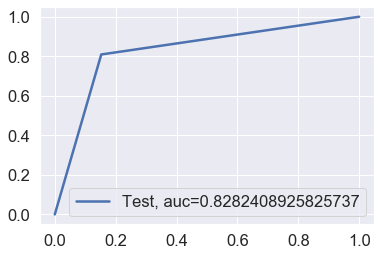

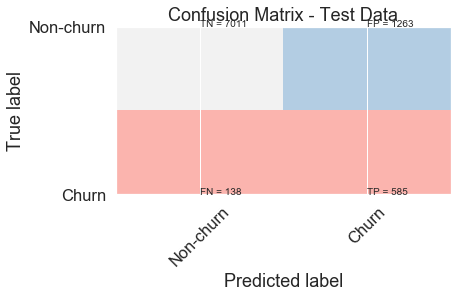

In [166]:
# Printing classification report
print(classification_report(y_test, y_pred66))
accuracy = metrics.accuracy_score(y_test, y_pred66)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred66)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred66)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [167]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred66))

LogisticRegression accuracy with PCA:  0.8442814271423807


1. Data is highly imbalanced with only 8.1% churn and remaining non-churn.
2. SMOTE is applied inorder to balance the data.
3. Accuracy is 85% with default PCA.
4. With 30 components explaining about ~95% of variance in data there by retaining accuracy of ~85%.
5. Key features are night_pck_user_6 ,night_pck_user_7 ,night_pck_user_8 ,fb_user_6 ,fb_user_7 ,rech_amt_6 ,rech_amt_7 ,rech_amt_8 and rech_data_6.

## Decision Tree

In [168]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca66, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
df_test_pca66.shape

(8997, 66)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8274
           1       0.30      0.76      0.43       723

    accuracy                           0.84      8997
   macro avg       0.64      0.81      0.67      8997
weighted avg       0.92      0.84      0.87      8997

Accuracy for the test dataset 83.9%
ROC for the test dataset 80.5%


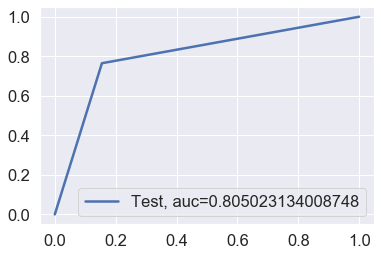

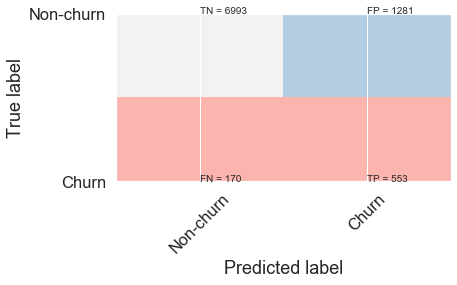

In [170]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=df_test_pca66)
y_pred1 = dt_default.predict(df_test_pca66)

# Printing classification report
print(classification_report(y_test, y_pred1))
accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
#plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [171]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[6993 1281]
 [ 170  553]]
Accuracy of Decision Tree : 0.8387240191174836


1. Data is highly imbalanced with only 8.1% churn and remaining non-churn.
2. SMOTE is applied inorder to balance the data.
3. Accuracy is 84% with default hyper-parameter.
4. Receiver Operator Characteristics is 81% which is good.
5. Type2 Error is less there by indicating that many of the non-churn customers are predicted as churn.
6. Type1 Error is more around 1253 there by indicating that the model has predicted non-churn customers as churn.

## Hyper-Parameter tuning

### Tuning max_depth

In [172]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 30)}, pre_dispatch='2*n_jobs',
 

In [173]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.47          0.03             0.01            0.01   
1           0.90          0.08             0.01            0.00   
2           1.21          0.04             0.01            0.00   
3           1.56          0.05             0.01            0.00   
4           2.10          0.26             0.01            0.01   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}               0.71               0.72   
1               2  {'max_depth': 2}               0.79               0.79   
2               3  {'max_depth': 3}               0.82               0.82   
3               4  {'max_depth': 4}               0.84               0.84   
4               5  {'max_depth': 5}               0.85               0.86   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0               0.72             0.72            0.00               29   
1               0.80             0.79            0.00               28   
2               0.83             0.82            0.01               27   
3               0.84             0.84            0.00               26   
4               0.86             0.85            0.00               25   

   split0_train_score  split1_train_score  split2_train_score  \
0                0.72                0.72                0.72   
1                0.80                0.79                0.79   
2                0.83                0.83                0.83   
3                0.85                0.85                0.84   
4                0.86                0.87                0.87   

   mean_train_score  std_train_score  
0              0.72             0.00  
1              0.80             0.00  
2              0.83             0.00  
3              0.85             0.00  
4              0.87             0.00

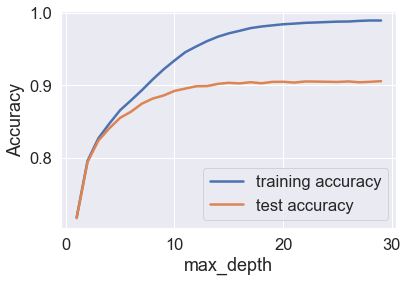

In [174]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph, it is clear that, the optimal value of max_depth = 10.

#### Tuning min_samples_leaf

In [175]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 100, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 100, 20)},
             p

In [176]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           7.68          0.34             0.01            0.01   
1           5.87          0.23             0.01            0.00   
2           5.20          0.10             0.02            0.00   
3           4.94          0.09             0.01            0.01   
4           4.84          0.17             0.01            0.01   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}               0.89   
1                     25  {'min_samples_leaf': 25}               0.87   
2                     45  {'min_samples_leaf': 45}               0.87   
3                     65  {'min_samples_leaf': 65}               0.86   
4                     85  {'min_samples_leaf': 85}               0.86   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0               0.89               0.89             0.89            0.00   
1               0.88               0.88             0.88            0.00   
2               0.87               0.88             0.87            0.00   
3               0.87               0.87             0.87            0.00   
4               0.86               0.86             0.86            0.00   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                0.97                0.97   
1                2                0.91                0.91   
2                3                0.90                0.89   
3                4                0.89                0.89   
4                5                0.88                0.88   

   split2_train_score  mean_train_score  std_train_score  
0                0.97              0.97             0.00  
1                0.91              0.91             0.00  
2                0.89              0.89             0.00  
3                0.88              0.88             0.00  
4                0.88              0.88             0.00

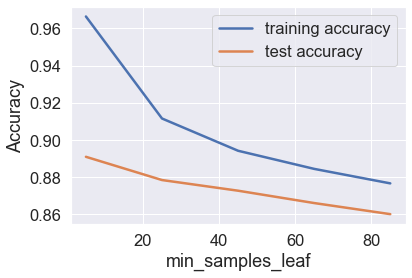

In [177]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph, it is clear that, the optimal value of min_sample_leaf = 25.

#### Tuning min_samples_split

In [178]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [179]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          11.82          1.92             0.02            0.00   
1           9.52          0.62             0.01            0.01   
2           9.58          0.53             0.02            0.00   
3           9.70          0.65             0.01            0.00   
4           9.78          0.73             0.02            0.00   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}               0.89   
1                      25  {'min_samples_split': 25}               0.88   
2                      45  {'min_samples_split': 45}               0.88   
3                      65  {'min_samples_split': 65}               0.87   
4                      85  {'min_samples_split': 85}               0.87   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0               0.90               0.90             0.90            0.00   
1               0.89               0.89             0.89            0.00   
2               0.89               0.89             0.89            0.01   
3               0.89               0.89             0.88            0.01   
4               0.89               0.89             0.88            0.01   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                0.99                0.99   
1                2                0.97                0.97   
2                3                0.95                0.95   
3                4                0.94                0.94   
4                5                0.93                0.93   

   split2_train_score  mean_train_score  std_train_score  
0                0.99              0.99             0.00  
1                0.97              0.97             0.00  
2                0.95              0.95             0.00  
3                0.93              0.94             0.00  
4                0.92              0.93             0.00

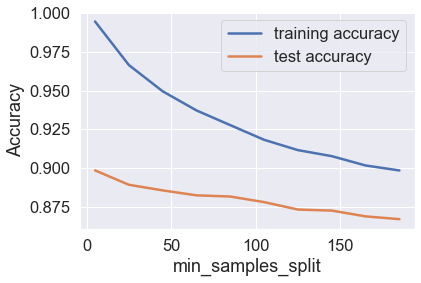

In [180]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph, it is clear that, the optimal value of min_sample_split = 50.

In [181]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca66, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  8.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [182]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8815242682134631


In [183]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Decision Tree Model with optimal Hyper-Parameters

In [184]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(df_train_pca66, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8274
           1       0.33      0.70      0.44       723

    accuracy                           0.86      8997
   macro avg       0.65      0.78      0.68      8997
weighted avg       0.92      0.86      0.88      8997

Accuracy for the test dataset 86.0%
ROC for the test dataset 78.5%


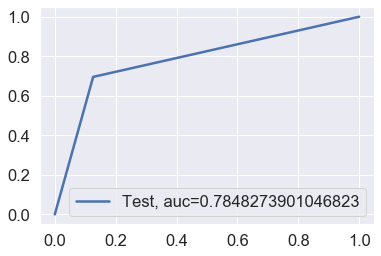

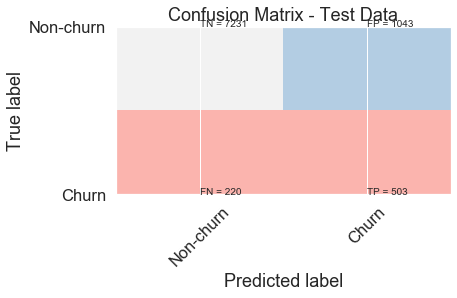

In [185]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=df_test_pca66)
y_pred_dt = clf_gini.predict(df_test_pca66)

# Printing classification report
print(classification_report(y_test, y_pred_dt))
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [186]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))
# confusion matrix
print(confusion_matrix(y_test,y_pred_dt))

Accuracy Score for Decision Tree Final Model : 0.859619873291097
[[7231 1043]
 [ 220  503]]


1. Accuracy is ~86% with default hyper-parameter.
2. Receiver Operator Characteristics is 80~%.
3. Type2 Error is less there by indicating that many of the non-churn customers are predicted as churn.
4. Type1 Error is more around 1079 there by indicating that the model has predicted non-churn customers as churn , still exists even after hyperparameter tuning.

## Random Forest

#### Random Forest with Default Hyperparameters

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(df_train_pca66, y_tr)

# Make predictions
prediction_test = model_rf.predict(df_test_pca66)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9310881404912749


In [188]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8274
           1       0.57      0.56      0.56       723

    accuracy                           0.93      8997
   macro avg       0.77      0.76      0.76      8997
weighted avg       0.93      0.93      0.93      8997



In [189]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7975  299]
 [ 321  402]]


1. Accuracy is ~94% with default hyper-parameter.
2. Receiver Operator Characteristics is 90%.
3. Type2 Error is less there by indicating that many of the non-churn customers are predicted as churn.
4. Type1 Error is more around 330 there by indicating that the model has predicted non-churn customers as churn , still exists.

#### Hyper-Parameter Tuning

Tuning max_depth

In [190]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 2

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(df_train_pca66, y_tr)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [191]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           5.38          0.14             0.28            0.02   
1          14.41          0.09             0.38            0.02   
2          23.49          1.01             0.60            0.06   
3          30.50          3.32             0.59            0.00   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}               0.84               0.86   
1               7   {'max_depth': 7}               0.88               0.89   
2              12  {'max_depth': 12}               0.93               0.94   
3              17  {'max_depth': 17}               0.95               0.95   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.85            0.01                4                0.85   
1             0.89            0.00                3                0.91   
2             0.93            0.00                2                0.98   
3             0.95            0.00                1                0.99   

   split1_train_score  mean_train_score  std_train_score  
0                0.86              0.85             0.00  
1                0.90              0.91             0.00  
2                0.98              0.98             0.00  
3                0.99              0.99             0.00

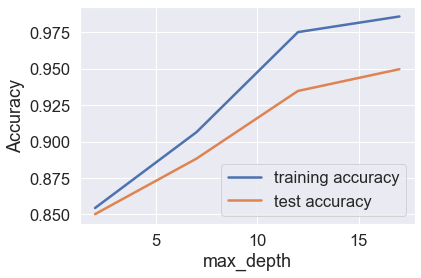

In [192]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph it is clear that max_depth=10 is optimal.

### Tuning n_estimators

In [193]:
## GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#
#
## specify number of folds for k-fold CV
n_folds = 3
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

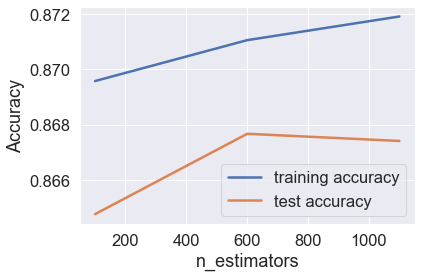

In [194]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph it is clear that the optimal value for n_estimators=600.

#### Tuning min_samples_leaf

In [195]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
 
# instantiate the model
rf = RandomForestClassifier()

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 200, 50)}

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

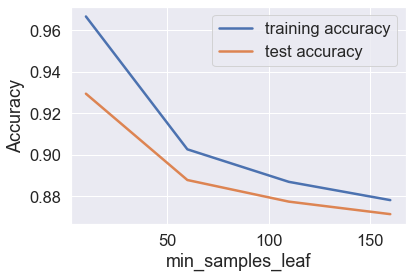

In [196]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph it is clear that the optimal value for min_samples_leaf=50.

#### Tuning min_samples_split

In [197]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(10, 300, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(df_train_pca66, y_tr)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

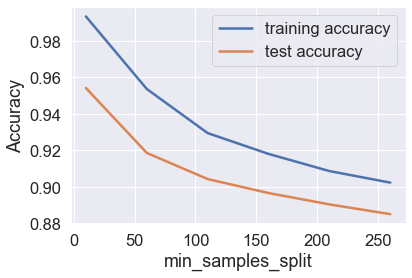

In [198]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above graph it is clear that the optimal value for min_samples_split=10.

Random Forest with Optimal Hyper-Parameters

In [199]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 200, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1,verbose = 1)

In [200]:
rf = RandomForestClassifier(max_depth = 10,
                           n_estimators = 1000,
                           min_samples_leaf = 50 ,
                           min_samples_split = 10,
                           max_features = 15,
                           oob_score = True, n_jobs = -1,
                                  random_state =50)
rf.fit(df_train_pca66,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8274
           1       0.43      0.71      0.54       723

    accuracy                           0.90      8997
   macro avg       0.70      0.81      0.74      8997
weighted avg       0.93      0.90      0.91      8997

Accuracy for the test dataset 90.2%
ROC for the test dataset 81.4%


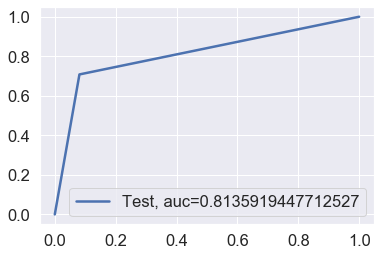

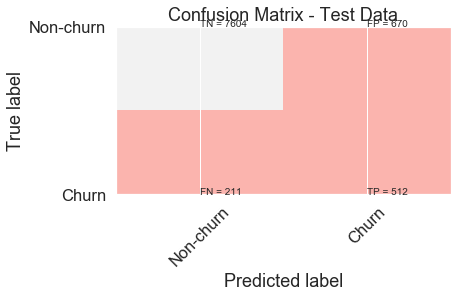

In [201]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=df_test_pca66)
y_pred_rf = rf.predict(df_test_pca66)

# Printing classification report
print(classification_report(y_test, y_pred_rf))
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

### Important Fetures From Random Forest 

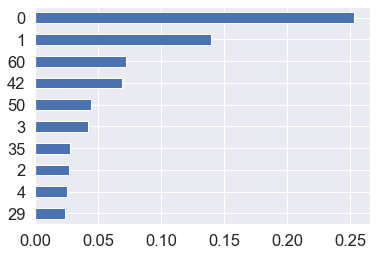

In [202]:
importances_rf = rf.feature_importances_
weights = pd.Series(importances_rf,
                 index=X_test.columns)
weights.sort_values()[-10:].plot(kind = 'barh')

1. Accuracy is 90% with  hyper-parameter tunnig.
2. Receiver Operator Characteristics is 81%.
3. Type2 Error is less there by indicating that many of the non-churn customers are predicted as churn.
4. Type1 Error is more around 664 there by indicating that the model has predicted non-churn customers as churn , still exists.

### Logistic Regression With RFE

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### Feature Selection using RFE

In [205]:
lr = LogisticRegression()
# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [206]:
rfe_features = X.columns[rfe.support_]
print("Features identified by RFE ", rfe_features)

Features identified by RFE  Index(['rech_data_8', 'total_onnet_mou', 'total_offnet_mou',
       'total_loc_og_t2t_mou', 'total_loc_og_mou', 'total_std_og_t2t_mou',
       'total_loc_ic_mou', 'onnet_offnet_difference', 'good_action_onnet_mou',
       'good_action_offnet_mou', 'good_action_og_others',
       'good_action_loc_ic_t2t_mou', 'good_action_loc_ic_t2m_mou',
       'good_action_spl_ic_mou', 'good_action_last_day_rch_amt'],
      dtype='object')


In [207]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [208]:
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4035 1498]
 [ 249  216]]


              precision    recall  f1-score   support

           0       0.94      0.73      0.82      5533
           1       0.13      0.46      0.20       465

    accuracy                           0.71      5998
   macro avg       0.53      0.60      0.51      5998
weighted avg       0.88      0.71      0.77      5998

Accuracy for the test dataset 70.9%
ROC for the test dataset 59.7%


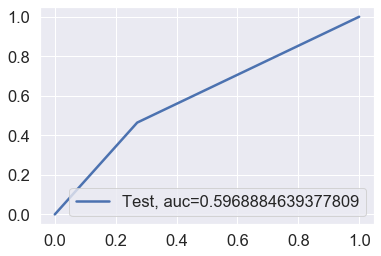

In [210]:
print(classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

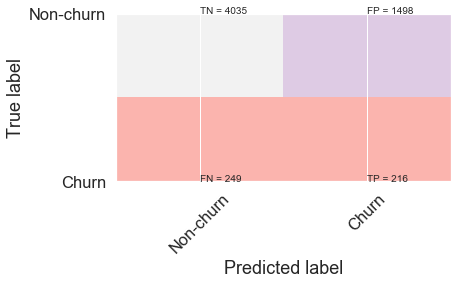

In [211]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
#plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

1. Accuracy is 73%.
2. Receiver Operator Characteristics is ~61%.
3. Type2 Error is less there by indicating that many of the non-churn customers are predicted as churn.
4. Type1 Error is more around 1355 there by indicating that the model has predicted non-churn customers as churn , still exists.

In [231]:
print ("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), rfe_features)))

Features sorted by their rank:
[(1, 'good_action_last_day_rch_amt'), (1, 'good_action_loc_ic_t2t_mou'), (1, 'good_action_spl_ic_mou'), (12, 'total_std_og_t2t_mou'), (15, 'good_action_loc_ic_t2m_mou'), (26, 'good_action_onnet_mou'), (34, 'total_offnet_mou'), (38, 'good_action_offnet_mou'), (45, 'good_action_og_others'), (58, 'total_loc_ic_mou'), (66, 'total_loc_og_t2t_mou'), (71, 'total_loc_og_mou'), (76, 'rech_data_8'), (80, 'onnet_offnet_difference'), (81, 'total_onnet_mou')]


## Step 6 : Summary and Recommendations

1. Offer discount on  roaming and outgoing packs.
2. Monitor the total recharge, offer additional talk time with additional validity on the recharges
3. Give more discount to the customers who have been with the network for more than an year or less than 3 months
4. Give additional data on data pack recharges (for 7th month)
5. Based on the **usage / last recharge**, if the usage is less compared to previous months, speak to the customer to know his concerns
6. Better **2G/3G area coverage** where 2G/3G services are not good, it's strong indicator of churn behaviour.
7. **Average revenue per** user seems to be most important feature in determining churn prediction.
8. Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.
9. Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
10. **Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

## Step 7 : Model Insights

| Model                        | Accuracy | ROC | Precision | Recall | f1 |
|------------------------------|----------|-----|-----------|--------|----|
| Logistic Regression with PCA | 85       | 83  | 98        | 85     | 91 |
| Decision Tree(Default)       | 84       | 81  | 98        | 85     | 91 |
| Decision Tree                | 86       | 80  | 97        | 87     | 92 |
| Random Forest(Default)       | 93       | 89  | 96        | 96     | 96 |
| Random Forest                | 90       | 81  | 97        | 92     | 95 |
| Logistic Regression With RFE | 73       | 61  | 94        | 76     | 84 |
|                              |          |     |           |        |    |

Random Forest(Default) produces good accurecy of about 93% and Random Forest with hyper-paramerter tuning produces accuracy of 90%.

Decision tree with tuned hyper-parameter produces accuracy of about 86%.

Logistic Regression with PCA produces accuracy of 85%.

As per our analysis Random Forest(Default) produce best accuracy and models can be selected to predict churn data for future dataset or production.